<a href="https://colab.research.google.com/github/wahyudimasdi/Dataminingproperty/blob/main/Copy_of_EDA_Data_Property_Kelompok_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KELOMPOK A CASE STUDY EDA DATA PROPERTY - DATA MINING (B)**

Anggota:
1. Abdul Muhaimin (2106703052)
2. Wahyu Dimasdi Putra (2106704636)
3. Vesya Padmadewi (2106726926)
4. Christi Novelina Panggabean (2106725021)
5. Jonathan Hadi Prasetyanto (2006529096)


# **Data Cleaning dan Pre-processing**

Pertama-tama, kami telah melakukan data cleaning dengan menggunakan software excel, yaitu menyelaraskan nama kolom dari setiap sheet, menyamakan bentuk tanggal pada created_at, menghapus tanda (-) menjadi kosong pada semua isi yang terdapat (-), menyamakan bentuk nilai harga dari semua daerah karena pada sheet berbeda bentuk harganya bermacam macam sehingga harus disamakan. Kemudian, kami menyatukan (merge) semua sheet tersebut ke dalam satu sheet saja sehingga pada import data di bawah ini tidak ada lagi import untuk setiap sheetnya.

# Info data

In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd

In [ ]:
#import file langsung dari drive
!gdown 1uRHUxagaDQFHcb7WMVzfvZYyqTP50jtr

Downloading...
From: https://drive.google.com/uc?id=1uRHUxagaDQFHcb7WMVzfvZYyqTP50jtr
To: /content/DATAFIXBGT.xlsx
100% 648k/648k [00:00<00:00, 117MB/s]


In [ ]:
data = pd.read_excel('/content/DATAFIXBGT.xlsx')
data.head()

wilayah           created_at    LT    LB   KT   KM  garasi  carport  \
0   Bogor  2021-03-12 00:00:00  75.0  38.0  2.0  1.0     1.0      1.0   
1   Bogor  2021-06-12 00:00:00  60.0  40.0  1.0  1.0     0.0      1.0   
2   Bogor  2021-06-12 00:00:00  60.0  50.0  2.0  2.0     0.0      1.0   
3   Bogor  2021-06-12 00:00:00  60.0  70.0  3.0  2.0     0.0      1.0   
4   Bogor  2021-06-12 00:00:00  90.0  60.0  3.0  2.0     0.0      2.0   

           lokasi sertifikat  listrik  hadap         harga  \
0      Bojonggede        SHM   1300.0  Barat  6.925500e+08   
1  Babakan Madang        SHM   2200.0    NaN  8.114000e+08   
2  Babakan Madang        SHM   2200.0    NaN  9.005000e+08   
3  Babakan Madang        SHM   2200.0    NaN  1.001900e+09   
4  Babakan Madang        SHM   2200.0    NaN  1.200800e+09   

                                                 URL  \
0  https://rumahdijual.com/bekasi/10799791-rumah-...   
1  https://www.rumah123.com/perumahan-baru/proper...   
2  https://www.rumah123.com/perumahan-baru/proper...   
3  https://www.rumah123.com/perumahan-baru/proper...   
4  https://www.rumah123.com/perumahan-baru/proper...   

                                           deskripsi  
0  Dekat tol jati warna, dekat sutle busway, deka...  
1  Destinasi menarik di kawasan Babakan Madang; G...  
2  Destinasi menarik di kawasan Babakan Madang; G...  
3  Destinasi menarik di kawasan Babakan Madang; G...  
4  Destinasi menarik di kawasan Babakan Madang; G...

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 0 to 3026
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   wilayah     3027 non-null   object 
 1   created_at  3027 non-null   object 
 2   LT          3027 non-null   float64
 3   LB          3026 non-null   float64
 4   KT          3020 non-null   float64
 5   KM          3021 non-null   float64
 6   garasi      1915 non-null   float64
 7   carport     2455 non-null   float64
 8   lokasi      3027 non-null   object 
 9   sertifikat  3016 non-null   object 
 10  listrik     2765 non-null   float64
 11  hadap       1305 non-null   object 
 12  harga       3024 non-null   float64
 13  URL         3024 non-null   object 
 14  deskripsi   3004 non-null   object 
dtypes: float64(8), object(7)
memory usage: 354.9+ KB


Dari data.info() diperoleh beberapa informasi seperti :


*   Dataset terdiri dari 3026 rows dengan 15 columns.
*   Terdapat 7 variabel bertipe object dan 8 variabel bertipe float
*   Terlihat bahwa terdapat non-null count pada setiap variable yang kurang dari 3026 hak ini mengindikasi adanya missing value.





In [ ]:
 data.dtypes

wilayah        object
created_at     object
LT            float64
LB            float64
KT            float64
KM            float64
garasi        float64
carport       float64
lokasi         object
sertifikat     object
listrik       float64
hadap          object
harga         float64
URL            object
deskripsi      object
dtype: object

Untuk keperluan olah data akan diubah beberapa data types dari variabel yang terkait.

In [ ]:
data['wilayah'] = data['wilayah'].astype('category')
data['created_at'] = data['created_at'].astype('category')
data['created_at'] = pd.to_datetime(data['created_at'])
data['sertifikat'] = data['sertifikat'].astype('category')
data['hadap'] = data['hadap'].astype('category')
data.dtypes

wilayah             category
created_at    datetime64[ns]
LT                   float64
LB                   float64
KT                   float64
KM                   float64
garasi               float64
carport              float64
lokasi                object
sertifikat          category
listrik              float64
hadap               category
harga                float64
URL                   object
deskripsi             object
dtype: object

Beberapa variabel bertipe object akan diubah ke kategorik dan untuk variabel created_at diubah menjadi datetime

# Statistika Deskriptive

In [ ]:
data.describe(include='all').transpose()

count unique                                                top  \
wilayah       3027     15                                              Bogor   
created_at    3027    251                                2023-06-06 00:00:00   
LT          3027.0    NaN                                                NaN   
LB          3026.0    NaN                                                NaN   
KT          3020.0    NaN                                                NaN   
KM          3021.0    NaN                                                NaN   
garasi      1915.0    NaN                                                NaN   
carport     2455.0    NaN                                                NaN   
lokasi        3027    653                                      Kota Semarang   
sertifikat    3016     21                                                SHM   
listrik     2765.0    NaN                                                NaN   
hadap         1305     35                                              Timur   
harga       3024.0    NaN                                                NaN   
URL           3024   2988  https://www.rumah123.com/perumahan-baru/proper...   
deskripsi     3004   2836                         Aset Lelang powered by BRI   

            freq      first       last               mean                 std  \
wilayah      295        NaT        NaT                NaN                 NaN   
created_at   365 2020-01-03 2024-09-22                NaN                 NaN   
LT           NaN        NaT        NaT         190.396871          260.027828   
LB           NaN        NaT        NaT         159.119564          178.148081   
KT           NaN        NaT        NaT           3.361921             2.60706   
KM           NaN        NaT        NaT           2.482291            2.654641   
garasi       NaN        NaT        NaT           0.738903            1.059724   
carport      NaN        NaT        NaT           1.329532            1.104265   
lokasi       105        NaT        NaT                NaN                 NaN   
sertifikat  2693        NaT        NaT                NaN                 NaN   
listrik      NaN        NaT        NaT        2692.375769         3318.174423   
hadap        358        NaT        NaT                NaN                 NaN   
harga        NaN        NaT        NaT  3616110344.699736  53198043402.047523   
URL            6        NaT        NaT                NaN                 NaN   
deskripsi     23        NaT        NaT                NaN                 NaN   

                   min          25%           50%           75%  \
wilayah            NaN          NaN           NaN           NaN   
created_at         NaN          NaN           NaN           NaN   
LT                 7.0         81.0         119.0         200.0   
LB                 7.0         60.0         100.0        193.75   
KT                 1.0          2.0           3.0           4.0   
KM                 1.0          1.0           2.0           3.0   
garasi             0.0          0.0           1.0           1.0   
carport            0.0          1.0           1.0           2.0   
lokasi             NaN          NaN           NaN           NaN   
sertifikat         NaN          NaN           NaN           NaN   
listrik          130.0       1300.0        2200.0        2200.0   
hadap              NaN          NaN           NaN           NaN   
harga       30000000.0  600000000.0  1100000000.0  2200000000.0   
URL                NaN          NaN           NaN           NaN   
deskripsi          NaN          NaN           NaN           NaN   

                        max  
wilayah                 NaN  
created_at              NaN  
LT                   5050.0  
LB                   2875.0  
KT                    109.0  
KM                    106.0  
garasi                 13.0  
carport                19.0  
lokasi                  NaN  
sertifikat              NaN  
listrik             66000.0  
ha

In [ ]:
data.describe()

LT           LB           KT           KM       garasi  \
count  3027.000000  3026.000000  3020.000000  3021.000000  1915.000000   
mean    190.396871   159.119564     3.361921     2.482291     0.738903   
std     260.027828   178.148081     2.607060     2.654641     1.059724   
min       7.000000     7.000000     1.000000     1.000000     0.000000   
25%      81.000000    60.000000     2.000000     1.000000     0.000000   
50%     119.000000   100.000000     3.000000     2.000000     1.000000   
75%     200.000000   193.750000     4.000000     3.000000     1.000000   
max    5050.000000  2875.000000   109.000000   106.000000    13.000000   

           carport       listrik         harga  
count  2455.000000   2765.000000  3.024000e+03  
mean      1.329532   2692.375769  3.616110e+09  
std       1.104265   3318.174423  5.319804e+10  
min       0.000000    130.000000  3.000000e+07  
25%       1.000000   1300.000000  6.000000e+08  
50%       1.000000   2200.000000  1.100000e+09  
75%       2.000000   2200.000000  2.200000e+09  
max      19.000000  66000.000000  2.500000e+12

Berikut adalah statistik dari semua variabel numerik yang akan digunakan untuk olah data.

# Distribusi data

## Distribusi data variabel kategorik

In [ ]:
#count setiap kategori pada categorical variable
print(data.groupby(['wilayah'])[['created_at']].count().transpose())
print()
print(data.groupby(['sertifikat'])[['created_at']].count().transpose())
print()
print(data.groupby(['hadap'])[['created_at']].count().transpose())

wilayah     Bali  Bandung  Bekasi  Bogor  Depok  Jakarta  Kalimantan  Lampung  \
created_at   191      199     193    295    205      175         219      184   

wilayah     Medan  Padang Palembang  Semarang  Sulawesi  Surabaya  Tangerang  \
created_at    196               200       194       165       197        214   

wilayah     Yogyakarta  
created_at         200  

sertifikat  AJB  HGB  HJB  HP  Lainnya  Lainnya (PPJB,Girik,Adat,dll)  PPJB  \
created_at    1  117    1   3       13                              3    11   

sertifikat  PPJB,Girik,Adat,dll  SHBG  SHGB  ...  SHM   SHM & IMB  \
created_at                    1     1   119  ...     2          1   

sertifikat  SHM + Hak Pakai  SHM + IMB  SHM + IMB + PBB  SHM - IMB  SHM,IMB  \
created_at                1         17                1          4        2   

sertifikat  SMB   SPPJB  lainnya(PPJB, GIRIK, ADAT, dll)  
created_at     1      4                               20  

[1 rows x 21 columns]

hadap       Barat  Barat &

Selanjutnya akan dilakukan visualisasi count terhadap jumlah rumah pada masing masing wilayah.

Axes(0.125,0.11;0.775x0.77)


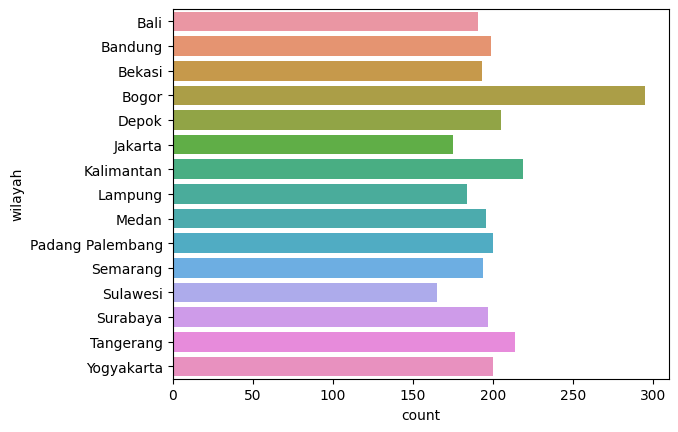

In [ ]:
import seaborn as sns
print(sns.countplot(data=data, y='wilayah'))

Axes(0.125,0.11;0.775x0.77)


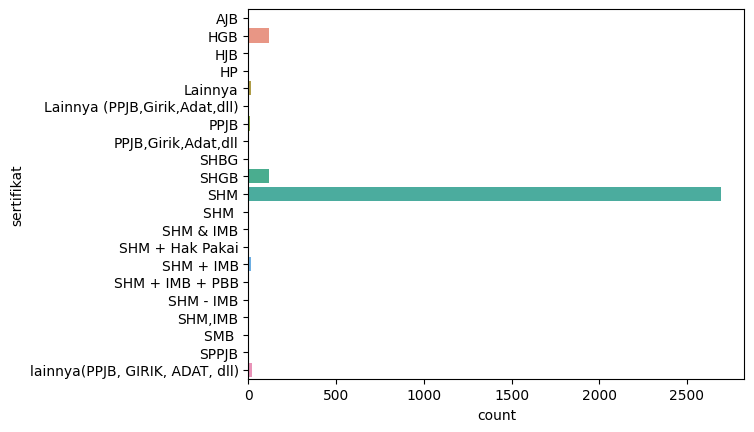

In [ ]:
print(sns.countplot(data=data, y='sertifikat'))

Axes(0.125,0.11;0.775x0.77)


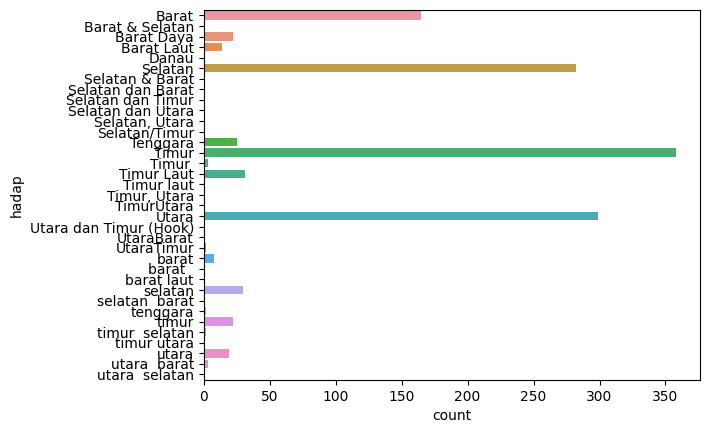

In [ ]:
print(sns.countplot(data=data, y='hadap'))

## Distribusi data variabel numerik

In [ ]:
data.columns

Index(['wilayah', 'created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport',
       'lokasi', 'sertifikat', 'listrik', 'hadap', 'harga', 'URL',
       'deskripsi'],
      dtype='object')

Akan digunakan histogram untuk melihat sebaran data numeriknya. Berikut adalah histogramnya :

<Axes: xlabel='LT', ylabel='Count'>

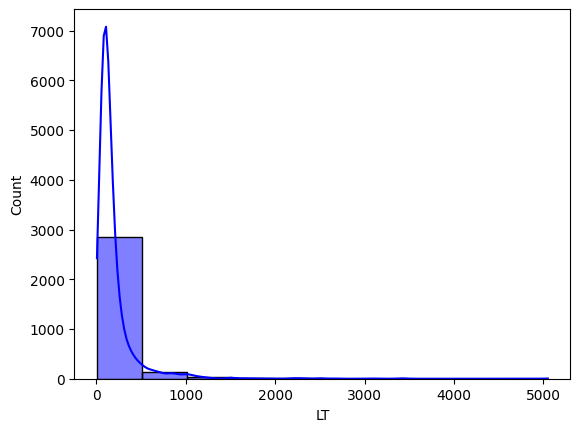

In [ ]:
a = data['LT']
sns.histplot(a, kde=True, color='b', bins=10)

<Axes: xlabel='LB', ylabel='Count'>

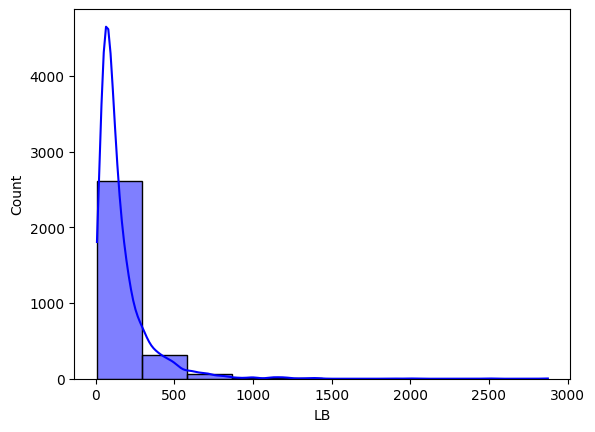

In [ ]:
b = data['LB']
sns.histplot(b, kde=True, color='b', bins=10)

<Axes: xlabel='KT', ylabel='Count'>

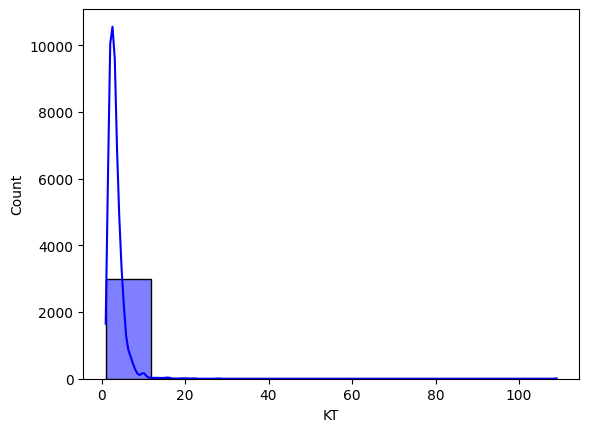

In [ ]:
c = data['KT']
sns.histplot(c, kde=True, color='b', bins=10)

<Axes: xlabel='KM', ylabel='Count'>

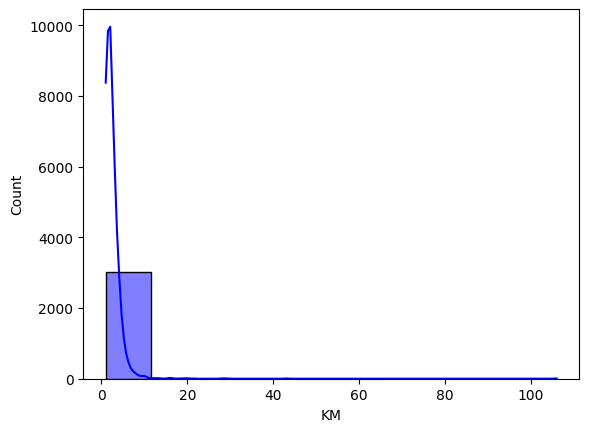

In [ ]:
d = data['KM']
sns.histplot(d, kde=True, color='b', bins=10)

<Axes: xlabel='garasi', ylabel='Count'>

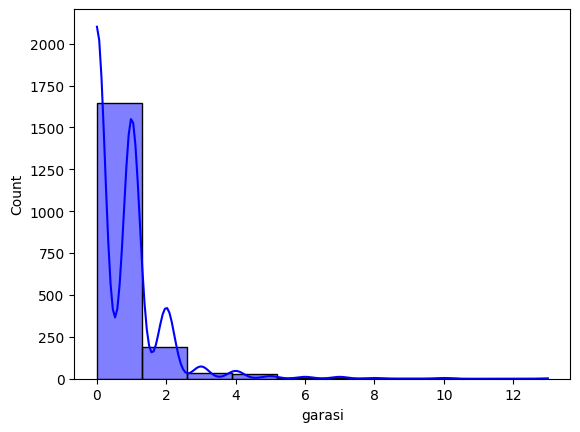

In [ ]:
e = data['garasi']
sns.histplot(e, kde=True, color='b', bins=10)

<Axes: xlabel='carport', ylabel='Count'>

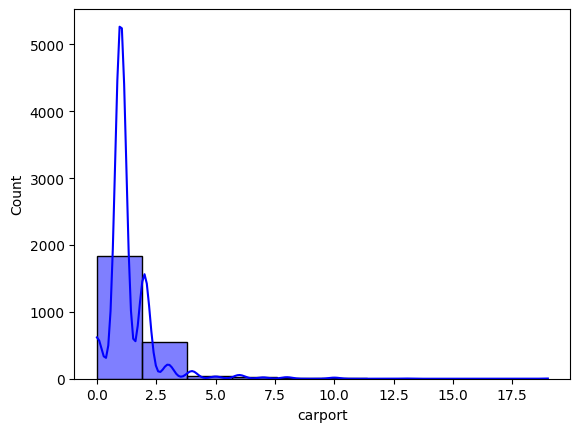

In [ ]:
f = data['carport']
sns.histplot(f, kde=True, color='b', bins=10)

<Axes: xlabel='listrik', ylabel='Count'>

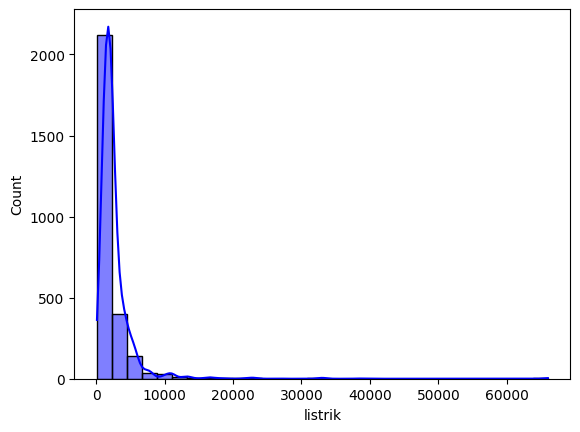

In [ ]:
g = data['listrik']
sns.histplot(g, kde=True, color='b', bins=30)

<Axes: xlabel='harga', ylabel='Count'>

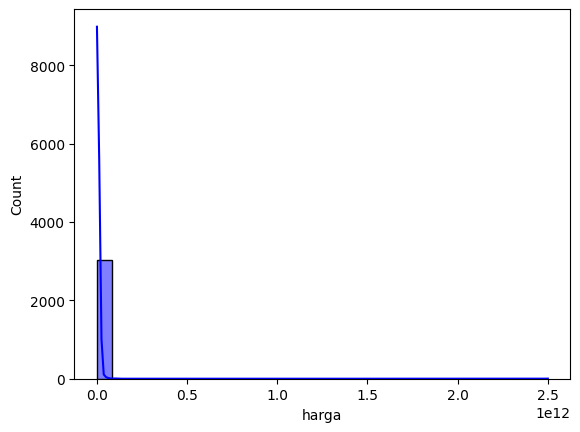

In [ ]:
h = data['harga']
sns.histplot(h, kde=True, color='b', bins=30)

# Correlation and Pair Plot

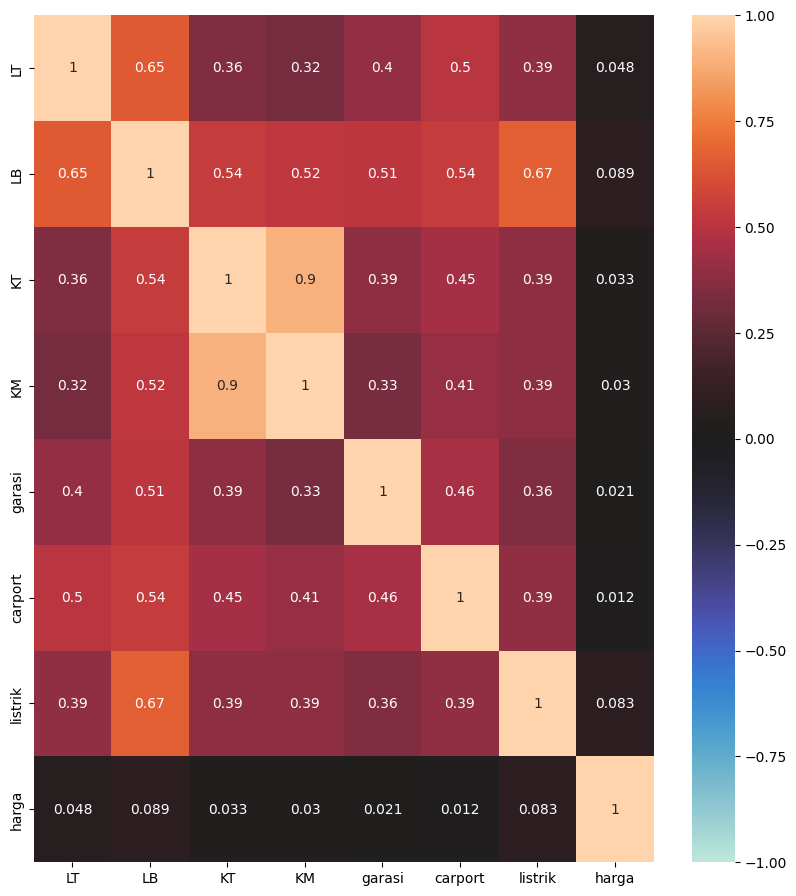

In [ ]:
import matplotlib.pyplot as plt

corr = data.corr()
plt.subplots(figsize=(10,11))
sns.heatmap(corr, vmin=-1, center=0, vmax=1, annot=True)
plt.show()

Dari heatmap pairplot di atas terlihat bahwa tidak ada korelasi antar variabel yang lebih dari 80% (korelasi besar) sehingga jika selanjutnya akan dilakukan pemodelan dapat mengantisipasi adanya multikolinearitas. Selanjutnya akan dilihat sebaran data antar variabel numerik dengan scatterplot. Berikut adalah pairplot untuk setiap variabel numeriknya :

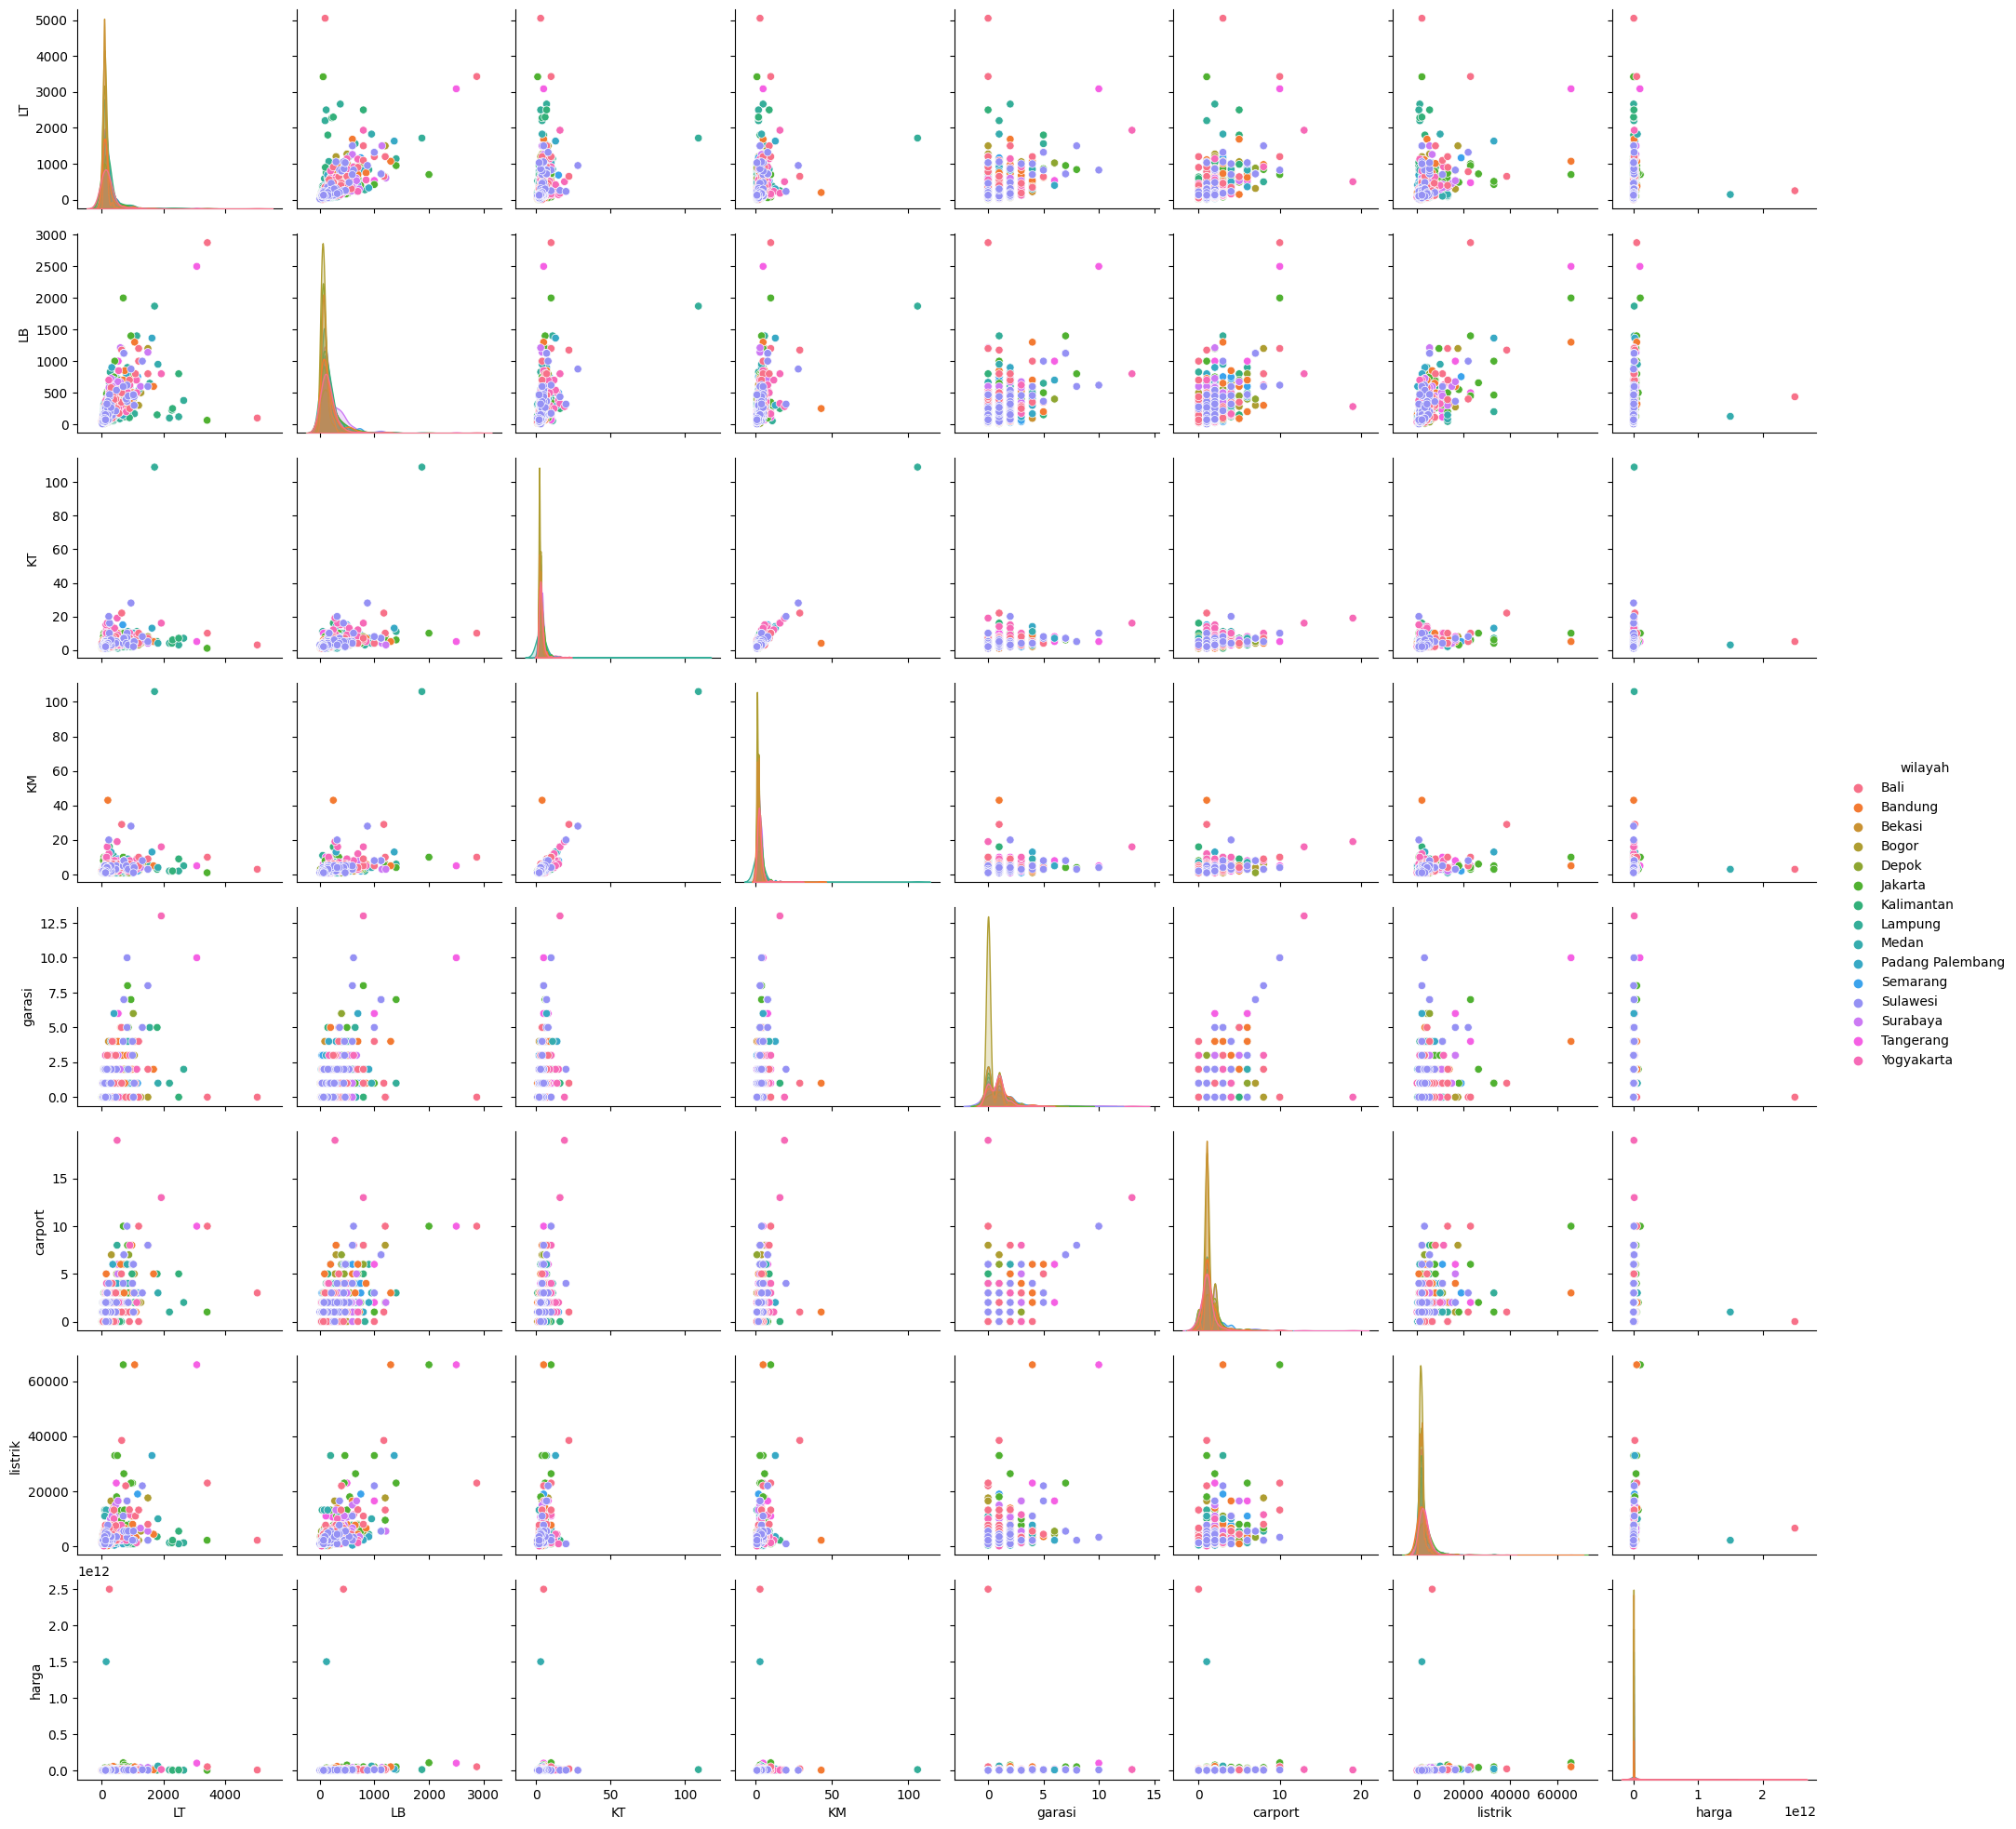

In [ ]:
col = []
for i in data.columns:
  col.append(i)
sns.pairplot(data[col], hue="wilayah")

# Missing Value

In [ ]:
data.isna().sum() / len(data)

wilayah       0.000000
created_at    0.000000
LT            0.000000
LB            0.000330
KT            0.002313
KM            0.001982
garasi        0.367360
carport       0.188966
lokasi        0.000000
sertifikat    0.003634
listrik       0.086554
hadap         0.568880
harga         0.000991
URL           0.000991
deskripsi     0.007598
dtype: float64

Terlihat bahwa terdapat cukup banyak missing value pada data terutama pada variabel garasi (sekitar 37%) dan variabel hadap (sekitar 57%). Selanjutnya akan dilakukan handling missing value.

In [ ]:
#handling missing value
#Isi missing values dengan nilai 0 pada kolom lb, garasi, carport, kt, dan km dengan asumsi tidak terdapat karakteristik tersebut,
#Tidak ada pada kolom sertifikat dengan asumsi tidak ada sertifikat pada rumah tersebut diisi dengan nilai 0.
#Drop baris dengan nilai harga dan listrik yang kosong
#Isi nilai NaN dengan unknown pada bagian variabel hadap
data['LB'] = data['LB'].fillna(0)
data['KT'] = data['KT'].fillna(0)
data['KM'] = data['KM'].fillna(0)
data['garasi'] = data['garasi'].fillna(0)
data['carport'] = data['carport'].fillna(0)
data.dropna(subset=['harga', 'listrik'], inplace = True)
existing_categories = data['sertifikat'].cat.categories
if 0 not in existing_categories:
    data['sertifikat'] = data['sertifikat'].cat.add_categories([0])
data['sertifikat'] = data['sertifikat'].fillna(0)
existing_categories2 = data['hadap'].cat.categories
if 'unknown' not in existing_categories2:
    data['hadap'] = data['hadap'].cat.add_categories(['unknown'])
data['hadap'] = data['hadap'].fillna('unknown')
data.isna().sum() / len(data)

wilayah       0.000000
created_at    0.000000
LT            0.000000
LB            0.000000
KT            0.000000
KM            0.000000
garasi        0.000000
carport       0.000000
lokasi        0.000000
sertifikat    0.000000
listrik       0.000000
hadap         0.000000
harga         0.000000
URL           0.000000
deskripsi     0.006153
dtype: float64

Terlihat bahwa missing value sudah bernilai 0% untuk setiap variabel yang dibutuhkan untuk olah data. Sementara variabel deskripsi nantinya akan di drop.

# Duplicate data

In [ ]:
#mengecek apakah ada duplikat data?
print(data.shape)
data.duplicated().sum()

(2763, 15)


0

Tidak ada duplicate pada data.

# Outlier

In [ ]:
data.columns

Index(['wilayah', 'created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport',
       'lokasi', 'sertifikat', 'listrik', 'hadap', 'harga', 'URL',
       'deskripsi'],
      dtype='object')

In [ ]:
#Boxplot untuk setiap variabel numerik
import plotly.express as px
AIplt1 = px.box(data, x="wilayah", y="LT", color='wilayah')
AIplt1.show()
print()
AIplt2 = px.box(data, x="wilayah", y="LB", color='wilayah')
AIplt2.show()
print()
AIplt3 = px.box(data, x="wilayah", y="KT", color='wilayah')
AIplt3.show()
print()
AIplt4 = px.box(data, x="wilayah", y="KM", color='wilayah')
AIplt4.show()
print()
AIplt5 = px.box(data, x="wilayah", y="garasi", color='wilayah')
AIplt5.show()
print()
AIplt6 = px.box(data, x="wilayah", y="carport", color='wilayah')
AIplt6.show()
print()
AIplt7 = px.box(data, x="wilayah", y="listrik", color='wilayah')
AIplt7.show()
print()
AIplt8 = px.box(data, x="wilayah", y="harga", color='wilayah')
AIplt8.show()

In [ ]:
#dibuat fungsi untuk menemukan outlier menggunkan IQR

def find_outliers_IQR(data):
   q1=data.quantile(0.25)
   q3=data.quantile(0.75)
   IQR=q3-q1
   outliers = data[((data<(q1-1.5*IQR)) | (data>(q3+1.5*IQR)))]
   return outliers

outliers = find_outliers_IQR(data[['LT', 'LB', 'KT', 'KM', 'garasi', 'carport','listrik']])
outliers.count()

LT          274
LB          209
KT           60
KM           54
garasi       68
carport    1221
listrik     394
dtype: int64

# Pembuatan dataframe outlier

In [ ]:
data = data.reset_index(drop=True)

In [ ]:
#dibuat dataframe kosong dengan kolom-kolom yang telah ditentukan
outlier_data = pd.DataFrame(columns=['wilayah', 'created_at',"LT","LB","KT","KM","garasi","carport","lokasi","sertifikat","listrik","hadap","harga", "URL", "deskripsi"])

#Outlier dipisah ke dataset baru

In [ ]:
def find_outliers(kolom):
  global outlier_data
  q1=data[kolom].quantile(0.25)
  q3=data[kolom].quantile(0.75)
  IQR = q3-q1
  for i in range(len(data[kolom])):
    if data[kolom][i] < q1-1.5*IQR or data[kolom][i] > q3 + 1.5*IQR:
      outlier_data.loc[len(outlier_data)] = data.iloc[i]

In [ ]:
find_outliers("harga")
find_outliers("listrik")
find_outliers("carport")
find_outliers("garasi")
find_outliers("KM")
find_outliers("KT")
find_outliers("LB")
find_outliers("LT")

#Duplicate outlier data

In [ ]:
outlier_data = outlier_data.drop_duplicates().reset_index(drop=True)

In [ ]:
outlier_data

wilayah created_at      LT      LB   KT   KM garasi carport  \
0        Bogor 2021-06-12  1500.0  1200.0  8.0  6.0    0.0     8.0   
1        Bogor 2021-06-12   699.0   350.0  5.0  5.0    0.0     2.0   
2        Bogor 2021-06-12  1272.0   500.0  4.0  5.0    0.0     2.0   
3        Bogor 2021-02-12   800.0   400.0  6.0  6.0    2.0     2.0   
4        Bogor 2021-02-12   437.0   340.0  5.0  5.0    2.0     2.0   
...        ...        ...     ...     ...  ...  ...    ...     ...   
1389   Bandung 2023-06-06   361.0   245.0  4.0  3.0    2.0     1.0   
1390      Bali 2021-07-12   480.0   250.0  4.0  3.0    1.0     1.0   
1391      Bali 2021-07-12   560.0   175.0  5.0  6.0    1.0     1.0   
1392      Bali 2023-07-28   910.0   250.0  7.0  6.0    0.0     1.0   
1393  Sulawesi 2021-10-01  1054.0   300.0  4.0  3.0    0.0     1.0   

                                             lokasi sertifikat  listrik  \
0                                         Cileungsi        SHM  17600.0   
1                                    Babakan Madang        SHM   3500.0   
2                                    Babakan Madang        SHM   5500.0   
3                                    Babakan Madang        SHM   5500.0   
4                                       Megamendung       SHGB   5500.0   
...                                             ...        ...      ...   
1389                                       Sukasari        SHM   2200.0   
1390                                       Denpasar        SHM   2200.0   
1391                                        Gianyar        SHM   3500.0   
1392                                         Bangli        SHM   3500.0   
1393  Kec. Mantikulore, Kota Palu, Sulawesi Tengah         SHM   2200.0   

        hadap          harga  \
0     unknown   9900000000.0   
1     unknown   7300000000.0   
2     unknown  15000000000.0   
3     unknown   7000000000.0   
4     unknown   5500000000.0   
...       ...            ...   
1389    Timur   2500000000.0   
1390  unknown   2500000000.0   
1391  unknown   2900000000.0   
1392  unknown   3800000000.0   
1393  unknown   2200000000.0   

                                                    URL  \
0     https://www.rumah.com/listing-properti/dijual-...   
1     https://www.rumah.com/listing-properti/dijual-...   
2     https://www.rumah.com/listing-properti/dijual-...   
3     https://www.rumah123.com/properti/bogor/hos926...   
4     https://www.rumah123.com/properti/bogor/hos926...   
...                                                 ...   
1389  https://www.rumah123.com/properti/bandung/hos1...   
1390  https://www.olx.co.id/item/rumah-jual-48-are-d...   
1391  https://www.olx.co.id/item/di-ajual-rumah-celu...   
1392  https://www.rumah.com/listing-properti/dijual-...   
1393  https://www.realoka.com/146653-dijual-rumah-2-...   

                                              deskripsi  
0     Akses mobil besar 40 ft bisa masuk, parkir mob...  
1     Plus kolam renang Babakan Madang, dekat dengan...  
2                                       Rumah best view  
3     Lokasi strategis, view bagus, aman (one gate s...  
4                    Lokasi strategis, ada kolam renang  
...                                                 ...  
1389  Lokasi strategis arah menuju Setiabudi, dekat ...  
1390  Lokasi strategis, silahkan nego sampe deal krn...  
1391  Akses Jalan 4 meter pribadi. Fasilitas full fu...  
1392  Dijual cepat rumah bali murah di Bangli\nrumah...  
1393  Rumah dengan lingkungan yang Asri dan nyaman, ...  

[1394 rows x 15 columns]

In [ ]:
#Data disimpan
outlier_data.to_csv("Outlier Data.csv", encoding='utf8', index=False)

In [ ]:
outlier_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   wilayah     1394 non-null   object        
 1   created_at  1394 non-null   datetime64[ns]
 2   LT          1394 non-null   object        
 3   LB          1394 non-null   object        
 4   KT          1394 non-null   object        
 5   KM          1394 non-null   object        
 6   garasi      1394 non-null   object        
 7   carport     1394 non-null   object        
 8   lokasi      1394 non-null   object        
 9   sertifikat  1394 non-null   object        
 10  listrik     1394 non-null   object        
 11  hadap       1394 non-null   object        
 12  harga       1394 non-null   object        
 13  URL         1394 non-null   object        
 14  deskripsi   1380 non-null   object        
dtypes: datetime64[ns](1), object(14)
memory usage: 163.5+ KB


# Data Tanpa Outlier dan Missing value

In [ ]:
import pandas as pd
import numpy as np
df = data

# Tentukan metode untuk mendeteksi outlier pada semua variabel
def detect_outliers(dataframe, columns, threshold=2):
    outliers = np.zeros(len(dataframe), dtype=bool)

    for column in columns:
        q1 = dataframe[column].quantile(0.25)
        q3 = dataframe[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        outliers = outliers | ((dataframe[column] < lower_bound) | (dataframe[column] > upper_bound))

    return outliers

# Pilih variabel-variabel yang ingin Anda cek untuk outlier
variables_to_check = ["LT","LB","KT","KM","garasi","carport","listrik","harga"]

# Deteksi outlier
outliers = detect_outliers(df, variables_to_check)

# Hapus baris dengan outlier dari DataFrame
df_cleaned = df[~outliers]
df_cleaned

wilayah created_at     LT    LB   KT   KM  garasi  carport  \
0        Bogor 2021-03-12   75.0  38.0  2.0  1.0     1.0      1.0   
1        Bogor 2021-06-12   60.0  40.0  1.0  1.0     0.0      1.0   
2        Bogor 2021-06-12   60.0  50.0  2.0  2.0     0.0      1.0   
3        Bogor 2021-06-12   60.0  70.0  3.0  2.0     0.0      1.0   
7        Bogor 2021-06-12   97.0  72.0  3.0  2.0     0.0      1.0   
...        ...        ...    ...   ...  ...  ...     ...      ...   
2757  Sulawesi 2023-09-19   51.0  48.0  2.0  2.0     0.0      1.0   
2759  Sulawesi 2023-09-18   96.0  96.0  2.0  1.0     0.0      1.0   
2760  Sulawesi 2023-09-17  115.0  45.0  2.0  1.0     0.0      1.0   
2761  Sulawesi 2023-09-14  102.0  72.0  2.0  1.0     0.0      1.0   
2762  Sulawesi 2023-07-17  127.0  72.0  2.0  1.0     0.0      1.0   

                                          lokasi sertifikat  listrik    hadap  \
0                                     Bojonggede        SHM   1300.0    Barat   
1                                 Babakan Madang        SHM   2200.0  unknown   
2                                 Babakan Madang        SHM   2200.0  unknown   
3                                 Babakan Madang        SHM   2200.0  unknown   
7                                       Cibinong        SHM   2200.0  Selatan   
...                                          ...        ...      ...      ...   
2757                          Makassar, Makassar        SHM   2200.0  unknown   
2759   Tanjung Bunga, Makassar, Sulawesi Selatan        SHM   3500.0  unknown   
2760         Palu Selatan, Palu, Sulawesi Tengah        SHM   1300.0  unknown   
2761         Puuwatu, Kendari. Sulawesi Tenggara        HGB    900.0    Utara   
2762                      Mamuju, Sulawesi Barat        SHM   2200.0  unknown   

             harga                                                URL  \
0     6.925500e+08  https://rumahdijual.com/bekasi/10799791-rumah-...   
1     8.114000e+08  https://www.rumah123.com/perumahan-baru/proper...   
2     9.005000e+08  https://www.rumah123.com/perumahan-baru/proper...   
3     1.001900e+09  https://www.rumah123.com/perumahan-baru/proper...   
7     1.230000e+09  https://www.rumah123.com/properti/bogor/hos920...   
...            ...                                                ...   
2757  6.000000e+08  https://www.99.co/id/properti/rumah-2-lantai-f...   
2759  6.750000e+08  https://www.rumah.com/listing-properti/dijual-...   
2760  3.480000e+08  https://www.rumah.com/listing-properti/dijual-...   
2761  1.750000e+08  https://www.99.co/id/properti/rumah-dijual-175...   
2762  6.000000e+08  https://www.rumah123.com/properti/mamuju/hos14...   

                                              deskripsi  
0     Dekat tol jati warna, dekat sutle busway, deka...  
1     Destinasi menarik di kawasan Babakan Madang; G...  
2     Destinasi menarik di kawasan Babakan Madang; G...  
3     Destinasi menarik di kawasan Babakan Madang; G...  
7     Berada dalam kawasan Pemda,  Hanya 5menit ke C...  
...                                                 ...  
2757  CLUSTER UTOPIA HUNIAN MILENIAL, TALASSACITY MA...  
2759  Dijual rumah siap huni di perumahan amarylis, ...  
2760  Jual Cepat Rumah bagus dan strategis Jl. Bante...  
2761  PERUMAHAN AFIKA LAND & AFIKA RESIDENCE TIPE 36...  
2762  Di jual rumah cantik di kota mamuju sulbar, de...  

[1385 rows x 15 columns]

In [ ]:
print(outlier_data.info())
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   wilayah     1394 non-null   object        
 1   created_at  1394 non-null   datetime64[ns]
 2   LT          1394 non-null   object        
 3   LB          1394 non-null   object        
 4   KT          1394 non-null   object        
 5   KM          1394 non-null   object        
 6   garasi      1394 non-null   object        
 7   carport     1394 non-null   object        
 8   lokasi      1394 non-null   object        
 9   sertifikat  1394 non-null   object        
 10  listrik     1394 non-null   object        
 11  hadap       1394 non-null   object        
 12  harga       1394 non-null   object        
 13  URL         1394 non-null   object        
 14  deskripsi   1380 non-null   object        
dtypes: datetime64[ns](1), object(14)
memory usage: 163.5+ KB
None
<class 'pa

Jumlah data cleaned dan outlier sama dengan jumlah data setelah dilakukan pengecekan missing value, outlier, dan data duplikat.

# Distribusi Data Numerik Pada Data Cleaned

<Axes: xlabel='LT', ylabel='Count'>

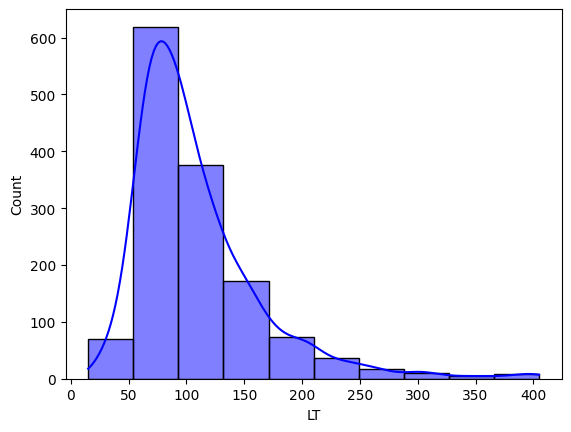

In [ ]:
a = df_cleaned['LT']
sns.histplot(a, kde=True, color='b', bins=10)

<Axes: xlabel='LB', ylabel='Count'>

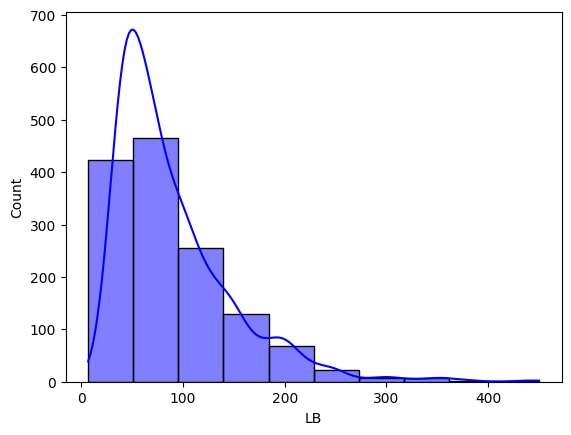

In [ ]:
b = df_cleaned['LB']
sns.histplot(b, kde=True, color='b', bins=10)

<Axes: xlabel='KT', ylabel='Count'>

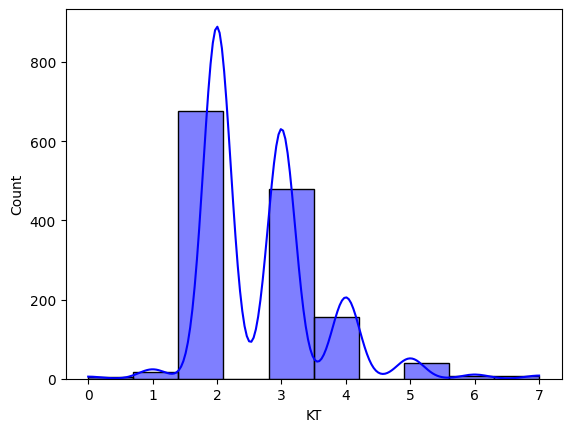

In [ ]:
c = df_cleaned['KT']
sns.histplot(c, kde=True, color='b', bins=10)

<Axes: xlabel='KM', ylabel='Count'>

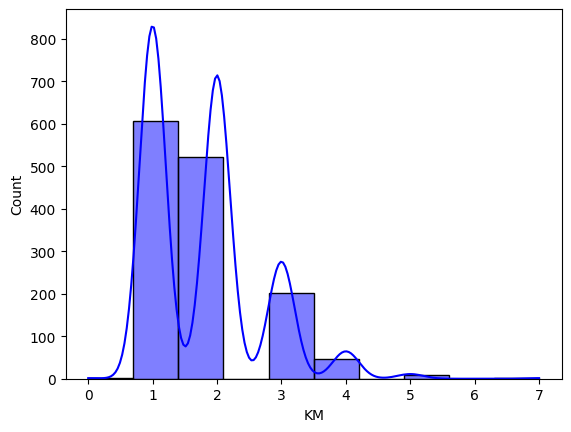

In [ ]:
d = df_cleaned['KM']
sns.histplot(d, kde=True, color='b', bins=10)

<Axes: xlabel='garasi', ylabel='Count'>

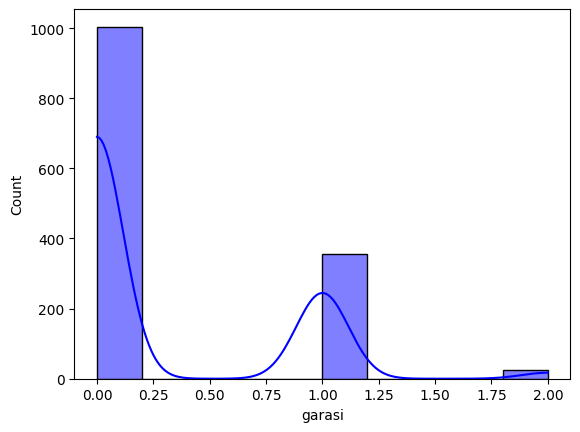

In [ ]:
e = df_cleaned['garasi']
sns.histplot(e, kde=True, color='b', bins=10)

<Axes: xlabel='carport', ylabel='Count'>

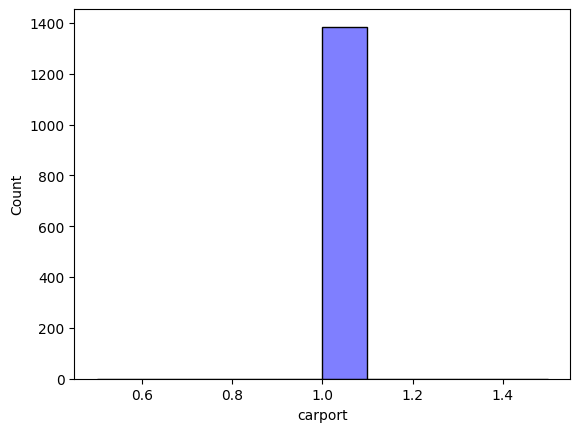

In [ ]:
f = df_cleaned['carport']
sns.histplot(f, kde=True, color='b', bins=10)

<Axes: xlabel='listrik', ylabel='Count'>

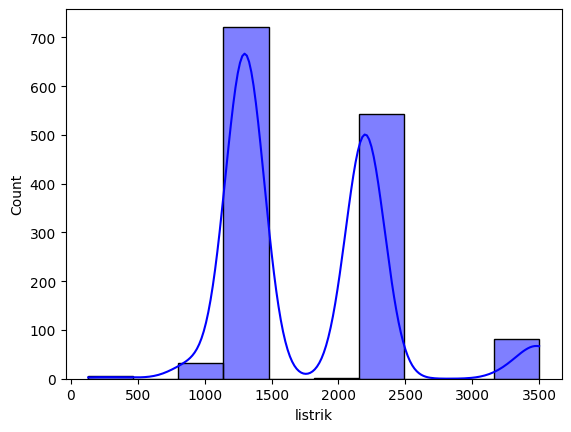

In [ ]:
g = df_cleaned['listrik']
sns.histplot(g, kde=True, color='b', bins=10)

<Axes: xlabel='harga', ylabel='Count'>

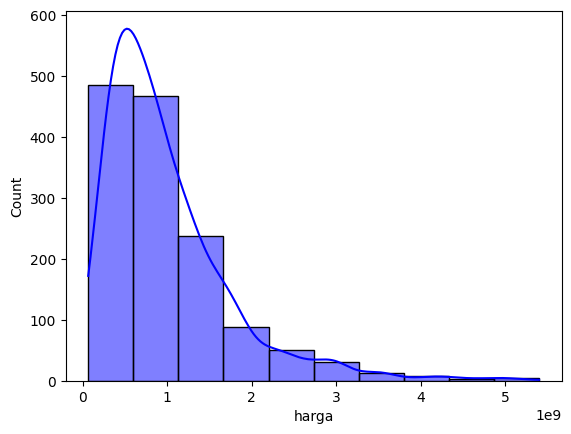

In [ ]:
h = df_cleaned['harga']
sns.histplot(h, kde=True, color='b', bins=10)

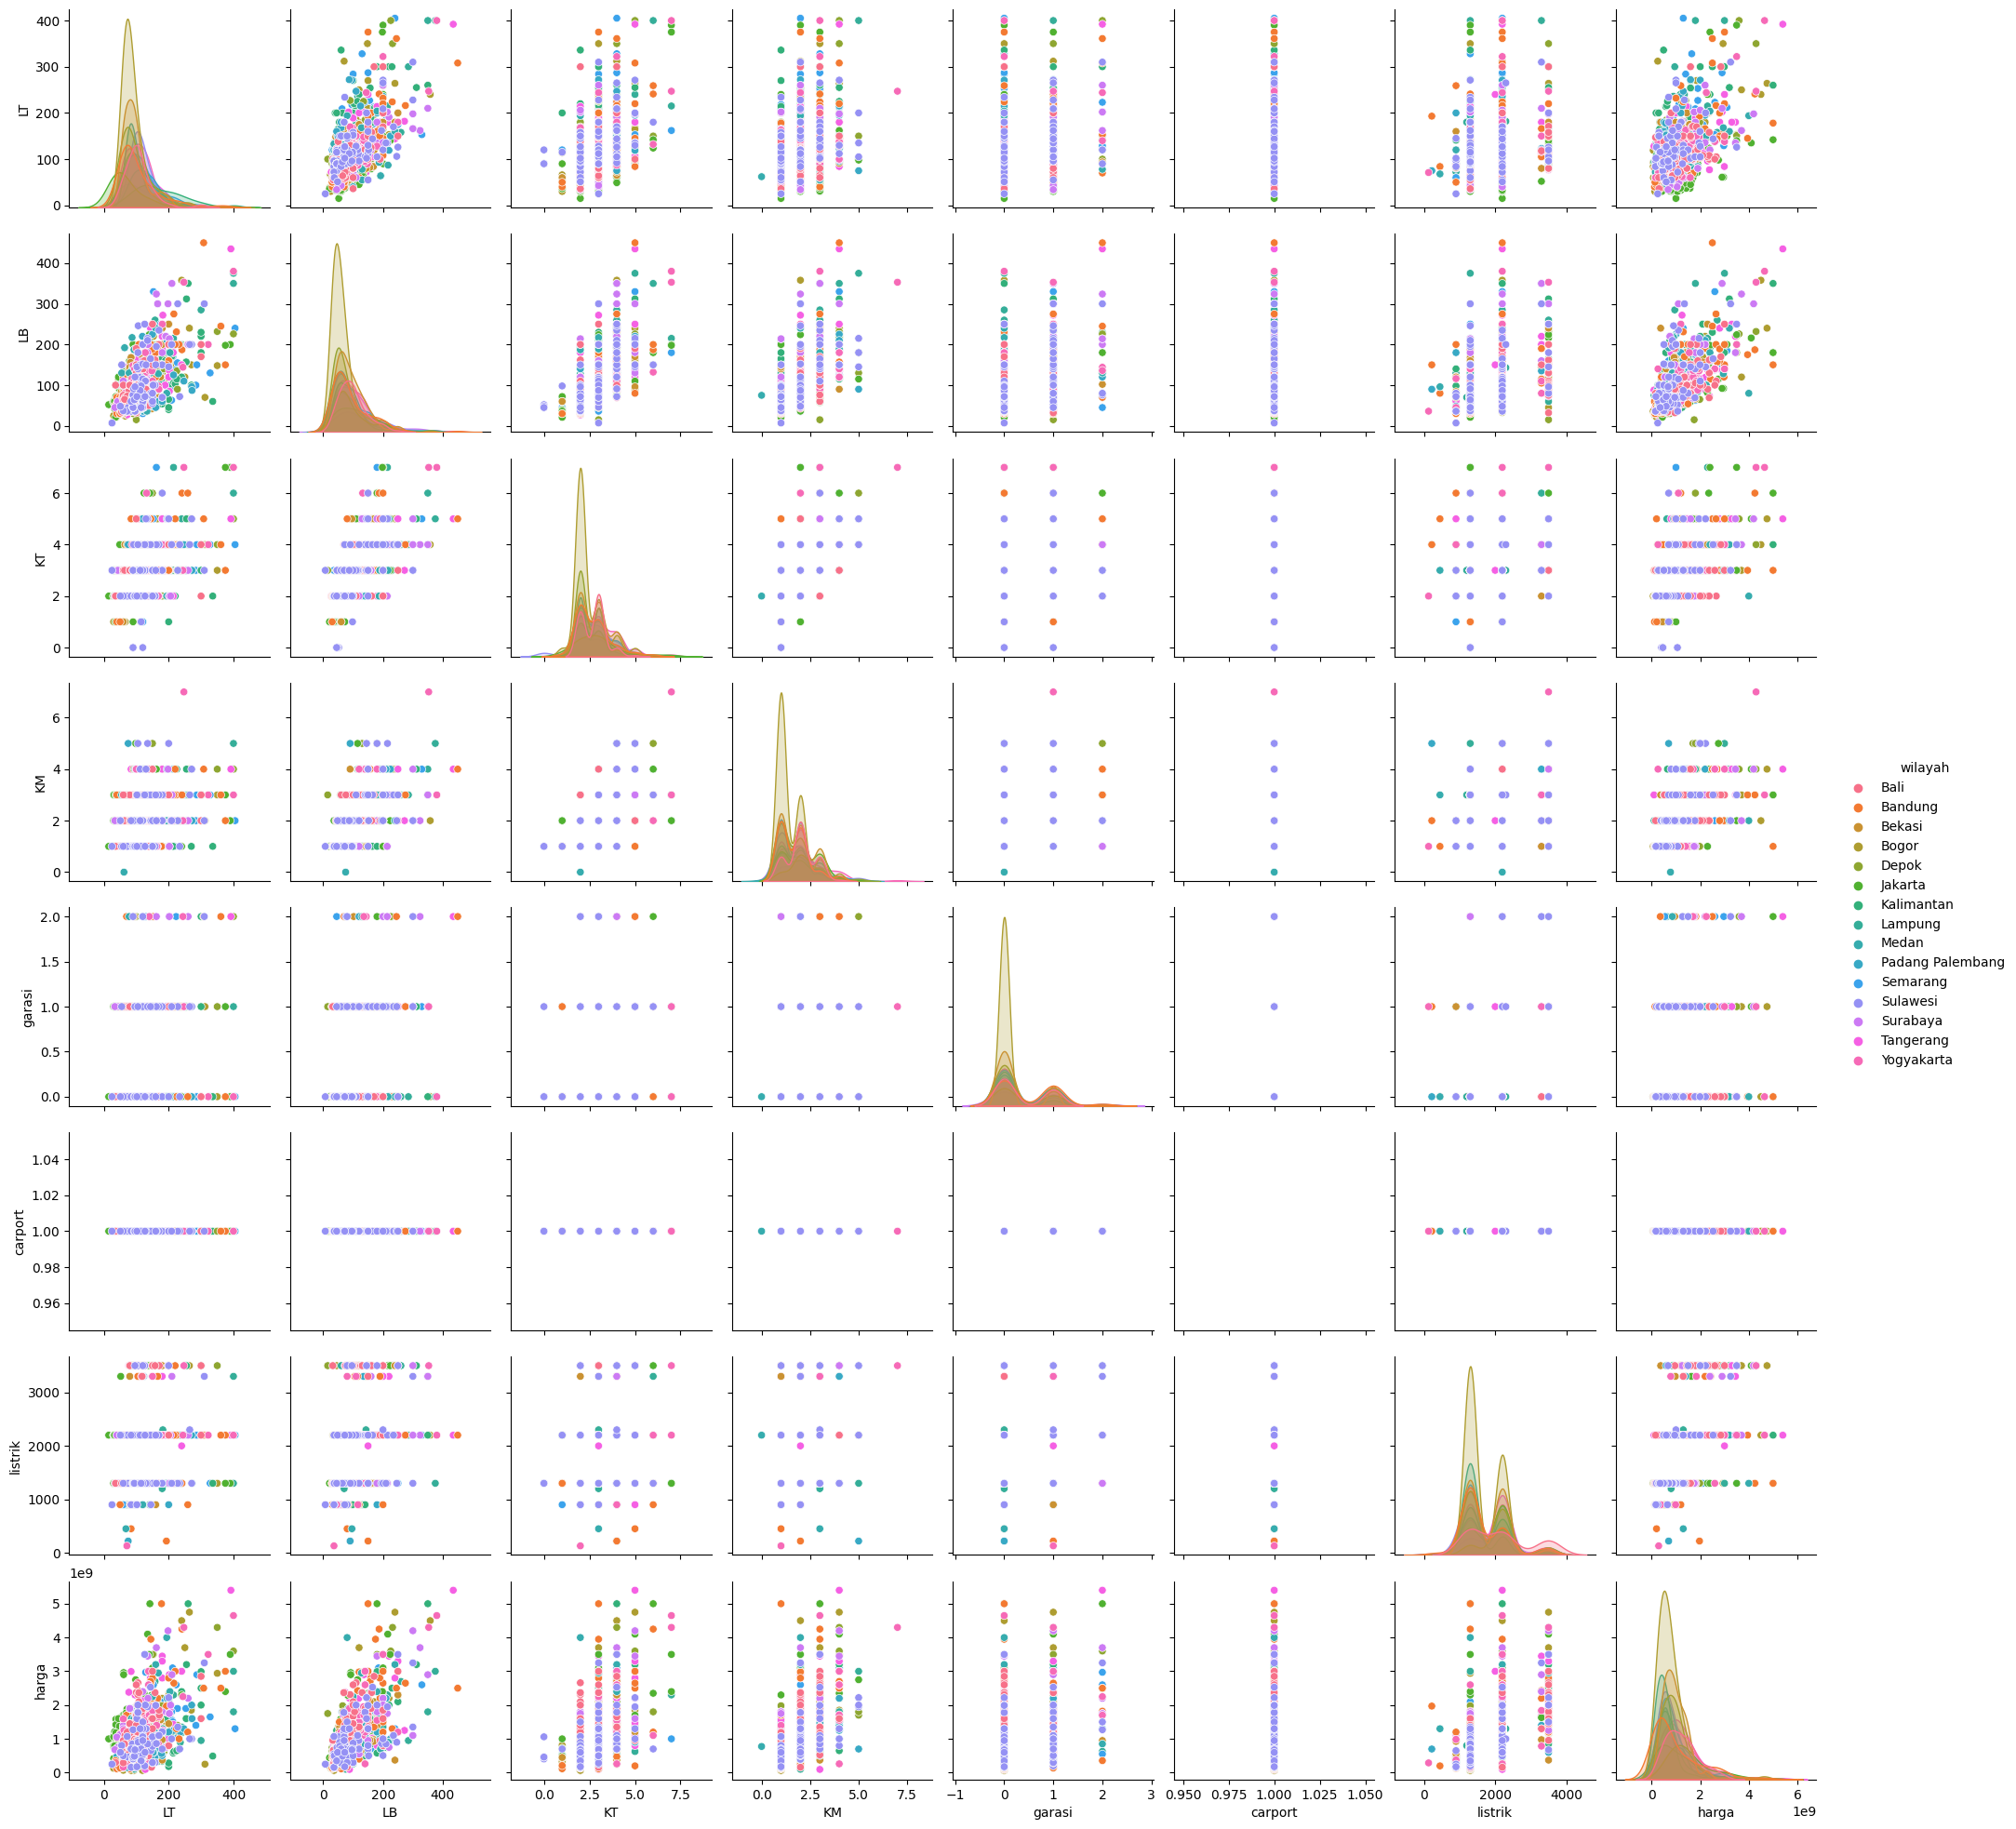

In [ ]:
col = []
for i in df_cleaned.columns:
  col.append(i)
sns.pairplot(df_cleaned[col], hue="wilayah")

# Save Data Prepo

In [ ]:
data.to_csv("data_PreProcessed.csv", encoding='utf8', index=False)

# 1. Kualitas data yang dimiliki perusahaan.

Secara keseluruhan masi terdapat beberapa kekurangan terkait kualitas data yang dimiliki perusahaan, seperti :


1.   Masih cukup banyak missing value pada data terutama pada garasi (sekitar 37%) dan hadap (sekitar 57%). Untuk variabel garasi beberapa konsumen tentu memerlukan informasi garasi terutama jika konsumen tersebut memiliki kendaraan beroda 4. Untuk variabel hadap terdengar sepele hanya dengan kondisi lingkungan, adat, dan kebudayaan di indonesia somehow hadap rumah merupakan salah satu hal penting yang dilihat oleh konsumen contoh sederhanyanya seperti fengshui, rumah tusuk sate, dll. Arah masuknya sinar matahari juga turut menjadi hal yang dipertimbangkan dalam pembelian rumah. Sehingga 57% data yang hilang akan sangat berpengaruh jika target pasar dari rumah yang dijual adalah orang orang yang masih memegang kepercayaan tersebut.
2.   Bila kesalahan terkait missing value terjadi pada (developer perumahan ?) yang tidak menyantumkan data pada laman iklannya sebaiknya dibuat ketentuan agar setiap data rumah untuk setiap aspek yang ditentukan tidak boleh kosong. Sebaliknya jika kesalahan terjadi pada pengambilan data, sebaiknya dilakukan evaluasi dan check kembali data yang telah diambil karena masih ada data yang kurang lengkap / missing walaupun di webnya sudah tertera.
3. Jumlah outlier data juga masih terbilang cukup banyak sehingga perlu dianalisis lebih lanjut apakah data outlier tersebut valid atau tidak nilainya.
4. Pada olah data phyton memang terlihat tidak ada data yang berduplikasi tetapi ketika dilakukan merging data di excel masih terdapat duplikasi data yang mana harus dihapus.

Selain dari kekurangan yang sudah dijelaskan di atas, kualitas data beberapa bulan terakhir cukup meningkat lebih baik karena data lebih terstruktur dan lengkap dibanding data bulan sebelumnya.

# 2. Apakah ada saran perbaikan data ke DE/DBA perusahaan agar RPPI menjadi data driven company yang unggul.



1. Terkait dengan missing value terdapat beberapa contoh penanganan, seperti contoh pada variabel garasi bila data rumah tidak memiliki garasi sebaiknya didata dengan nilai 0 (tidak dikosongin) sehingga nilai tidak terdeteksi menjadi missing value
2. Terkait dengan outlier, sebaiknya data ditempatkan terpisah sesuai kondisi wilayahnya, contohnya harga rumah di kampung terpencil akan berbeda dengan harga rumah di pusat ekonomi strategis dengan LT/LB yang sama. Hal tersebut dapat menjadi outlier pada olah data dan mau tidak mau ketika mengolah data, data analis harus mencari tau validitas outlier tersebut sehingga memakan waktu lebih lama.
3. Untuk data yang lebih rapih pada variabel lokasi, lokasi dapat dibuat lebih spesifik dengan mencantumkan tingkatan wilayah yang sama contohnya nama kelurahan atau kecamatan saja sehingga valuenya lebih terstruktur dan terkategorik dengan jelas.
4. Untuk variabel deskripsi dapat dibuat spesifik kolom baru contohnya dekat jalan raya atau tidak, dekat spbu atau tidak, ada fasilitas rumah sakit atau tidak, ada supermarket atau tidak, sehingga informasi yang didapat lebih baik dan terstruktur.
5.   Terkait dengan integrasi data, perusahaan harus memaksimalkan integrasi data dari berbagai sumber. Maksudnya data RPPI harus terhubung dengan data lain yang relevan seperti data demografi, data ekonomi, dan data properti untuk analisis yang lebih kaya.
6. Pembaruan data sebaiknya dilakukan secara Real-Time untuk memperbarui data RPPI sesegera mungkin sehingga memungkinkan pengambilan keputusan yang cepat.
7. Infrastruktur data harus kuat. Sejauh ini mungkin data masih bisa ditampung pada lembar kerja excel, tetapi perusahaan terus berkembang dan data baru yang masuk semakin banyak. Hal ini perlu menjadi perhatian khusus agak tidak ada data yang terbuang ketika tempat penyimpanan data sudah penuh.
8. Lakukan evaluasi secara berkala terhadap proses pengelolaan data dan penggunaan data RPPI. Identifikasi juga peluang perbaikan dan pertimbangkan masukan dari pengguna data.




# **Selanjutnya akan dilakukan visualisasi data yang menggunakan data clean dan data outlier yang diolah secara terpisah**

# **Visualisasi**

# 3. Dari data yang ada, apakah ada kecenderungan rumah di suatu kota lebih mahal/murah dibandingkan kota lain?

In [ ]:
#melihat persebaran harga dengan menggunakan mean dan standar deviasi agar hasil yang diperoleh lebih akurat
data_x = np.abs(df_cleaned.harga - df_cleaned.harga.mean())<=(2*df_cleaned.harga.std()) # mu-2s<x<mu+2s (mu= mean, s= standar deviasi)
print(data_x.shape)
data_x.head()

(1385,)


0    True
1    True
2    True
3    True
7    True
Name: harga, dtype: bool

In [ ]:
#membuat dataframe baru dari harga yang entry-entrynya berisi kisaran harga rumah di rentang mu-2s<x<mu+2s
df_new = df_cleaned[data_x]

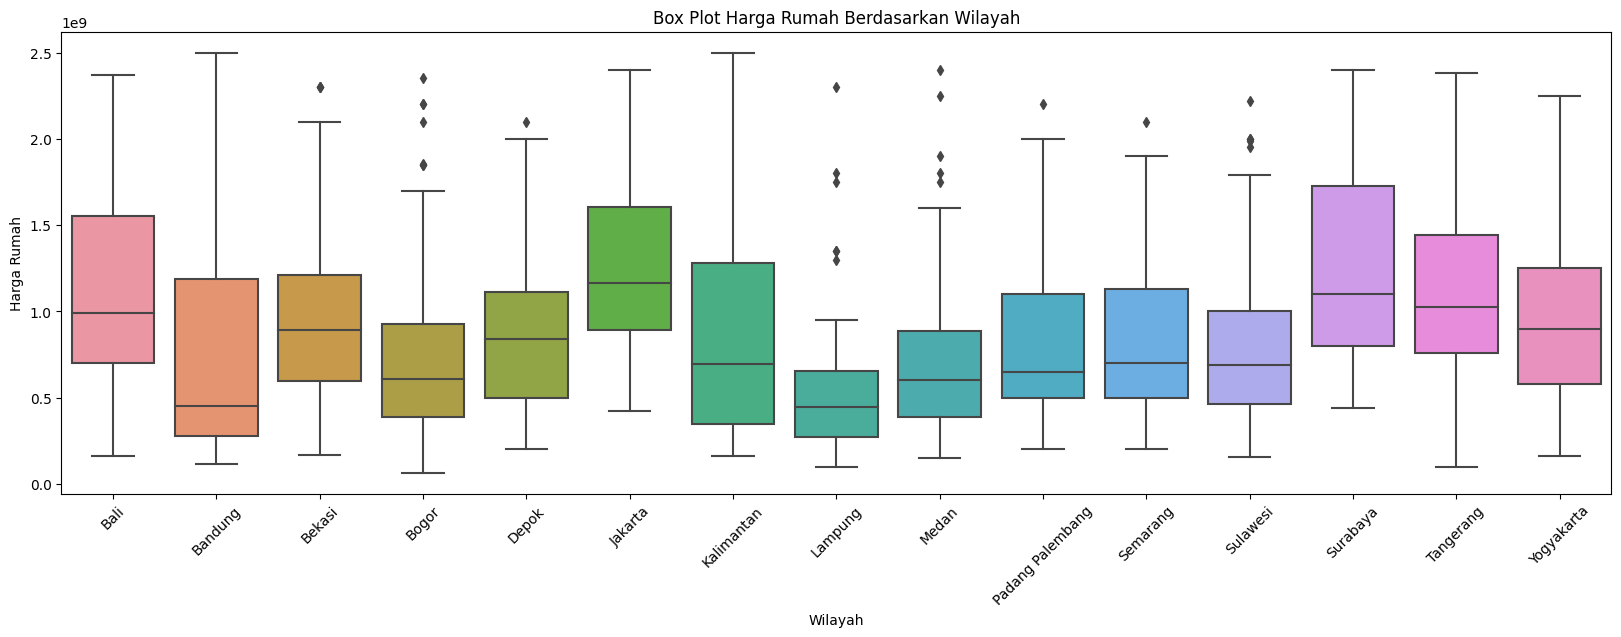

In [ ]:
#membuat boxplot untuk mengetahui persebaran harga rumah setiap wilayah
plt.figure(figsize=(20, 6))
sns.boxplot(x="wilayah", y="harga", data=df_new)
#menambahkan judul dan label sumbu x,y
plt.title('Box Plot Harga Rumah Berdasarkan Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Harga Rumah')
# Memutar label sumbu x untuk memastikan kejelasan
plt.xticks(rotation=45)
#menampilkan plot
plt.show()

Dapat terlihat dari visualisasi di atas,

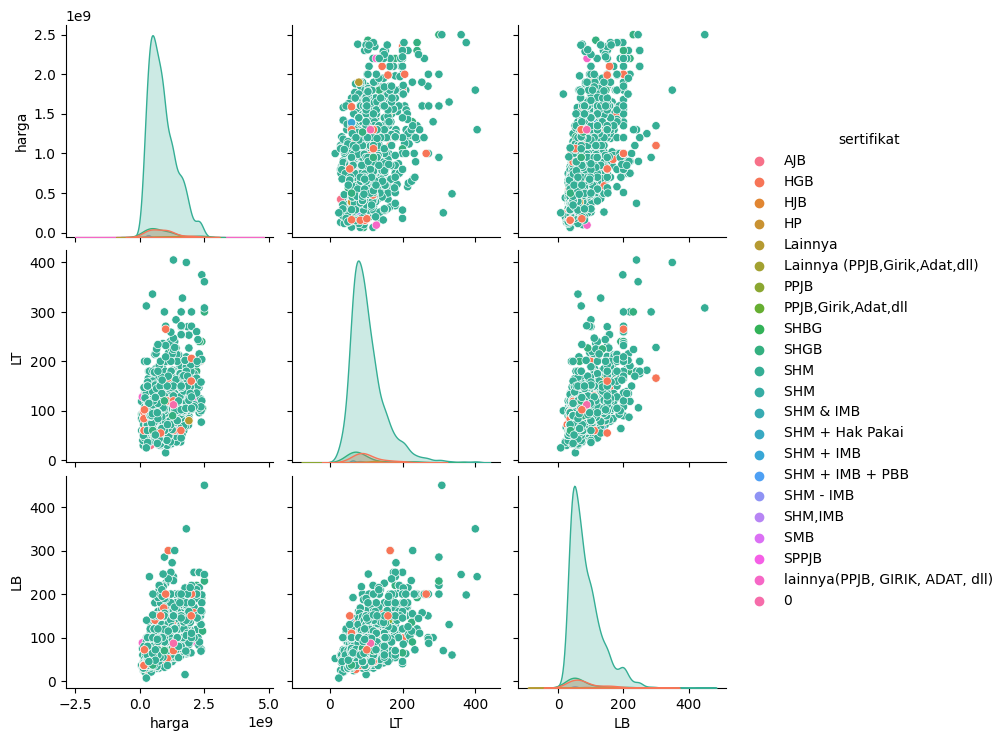

In [ ]:
#
df_3= df_new[['wilayah','harga','LT','LB','sertifikat']]
sns.pairplot(df_3, diag_kind='kde', markers='o',hue="sertifikat")
plt.show()

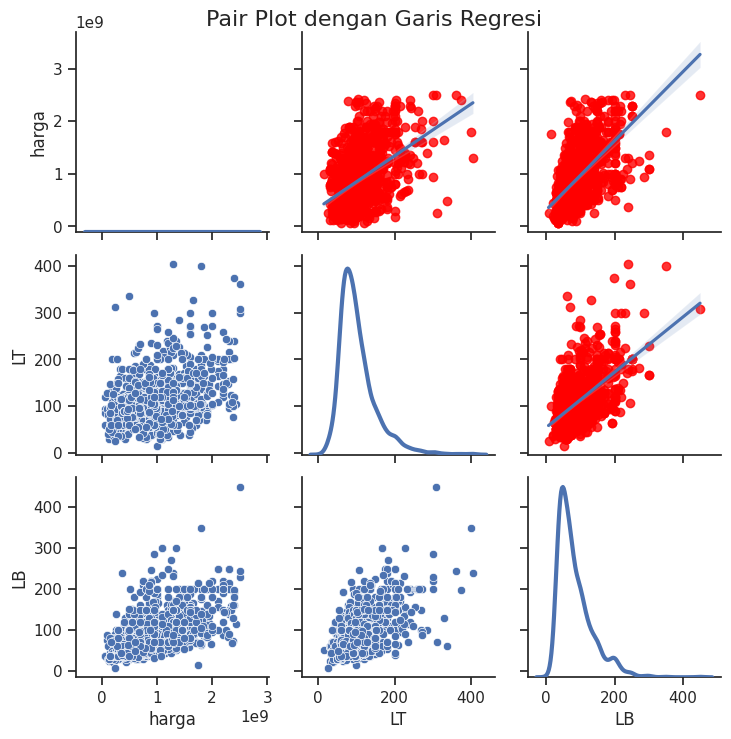

In [ ]:
#
sns.set(style="ticks")
g = sns.PairGrid(df_3)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot, lw=3)
g.map_upper(sns.regplot, scatter_kws={"color": "red"})

# Menyesuaikan layout
plt.subplots_adjust(top=0.95)
g.fig.suptitle('Pair Plot dengan Garis Regresi', size=16)
plt.show()

# 4. Dari data yang ada, apakah bisa dibuat rekomendasi sebaiknya RPPI membuat kantor cabang berikutnya di kota mana? Mengapa? (Asumsikan RPPI belum memiliki cabang di kota-kota yang disebutkan di data)

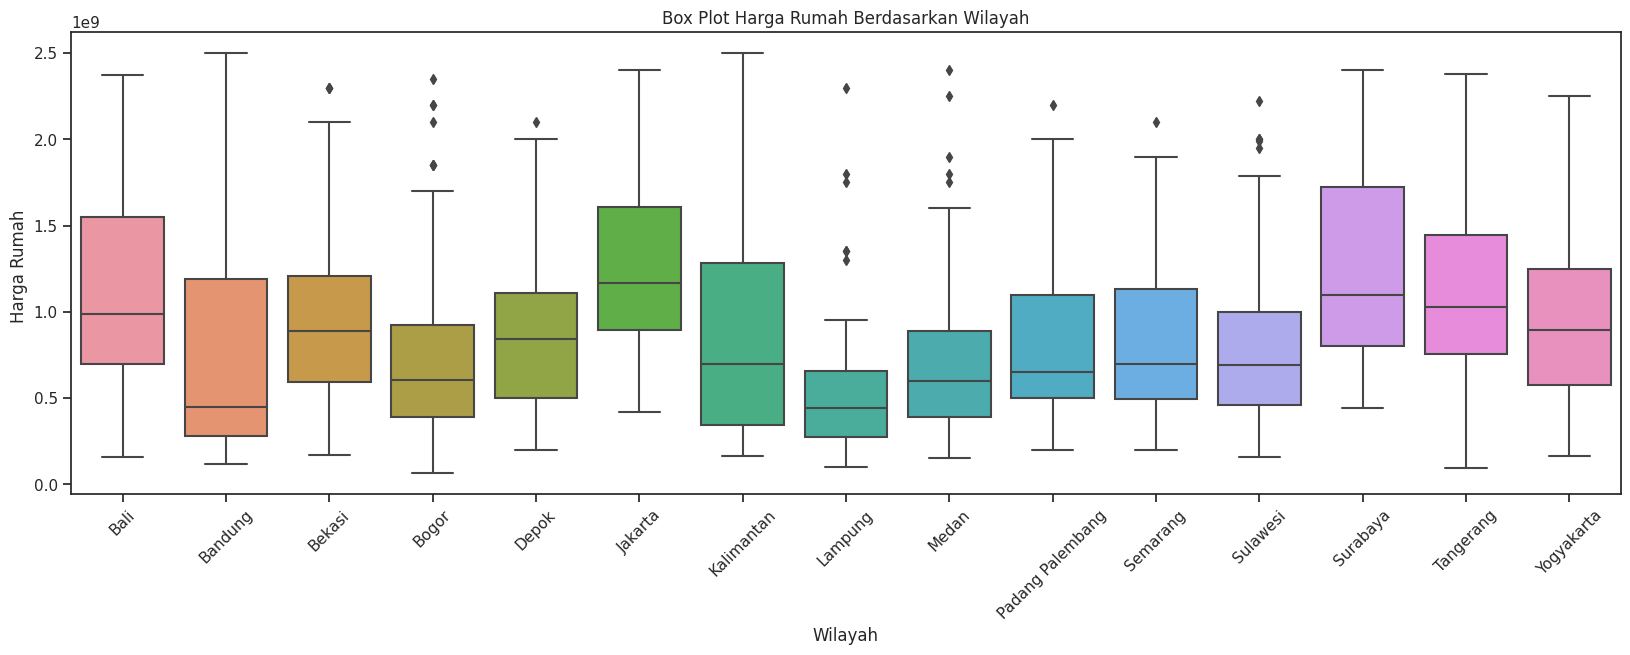

In [ ]:
#membuat boxplot untuk mengetahui persebaran harga rumah yang dijual setiap wilayah
plt.figure(figsize=(20, 6))
sns.boxplot(x="wilayah", y="harga", data=df_new)
#menambahkan judul dan label sumbu x,y
plt.title('Box Plot Harga Rumah Berdasarkan Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Harga Rumah ')
# Memutar label sumbu x untuk memastikan kejelasan
plt.xticks(rotation=45)
#menampilkan plot
plt.show()

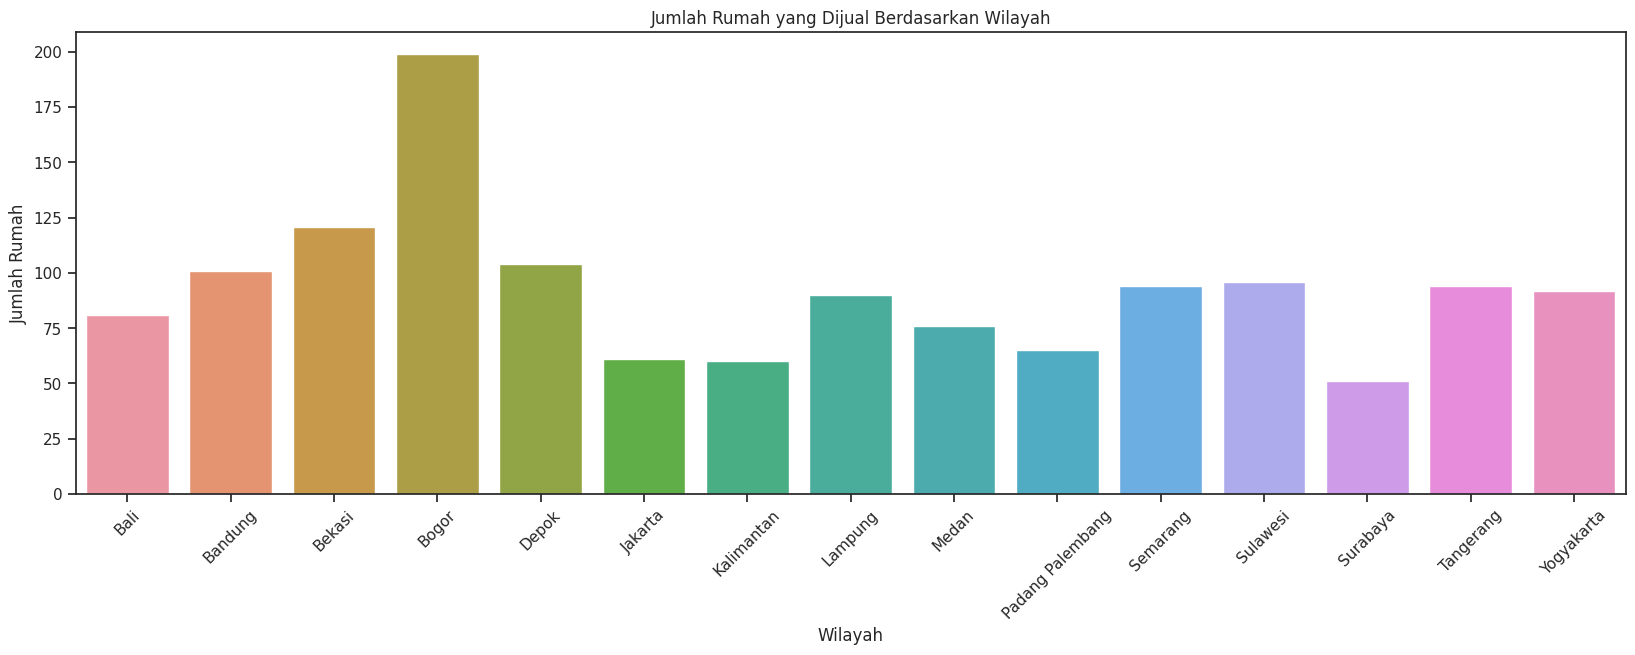

In [ ]:
# membuat count plot untuk mengetahui kuantitas atau jumlah yang dijual rumah setiap wilayah
plt.figure(figsize=(20, 6))
sns.countplot(x='wilayah', data=df_cleaned)

# menambahkan judul dan label sumbu x,y
plt.title('Jumlah Rumah yang Dijual Berdasarkan Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Jumlah Rumah')
# Memutar label sumbu x untuk memastikan kejelasan
plt.xticks(rotation=45)
# menampilkan plot
plt.show()

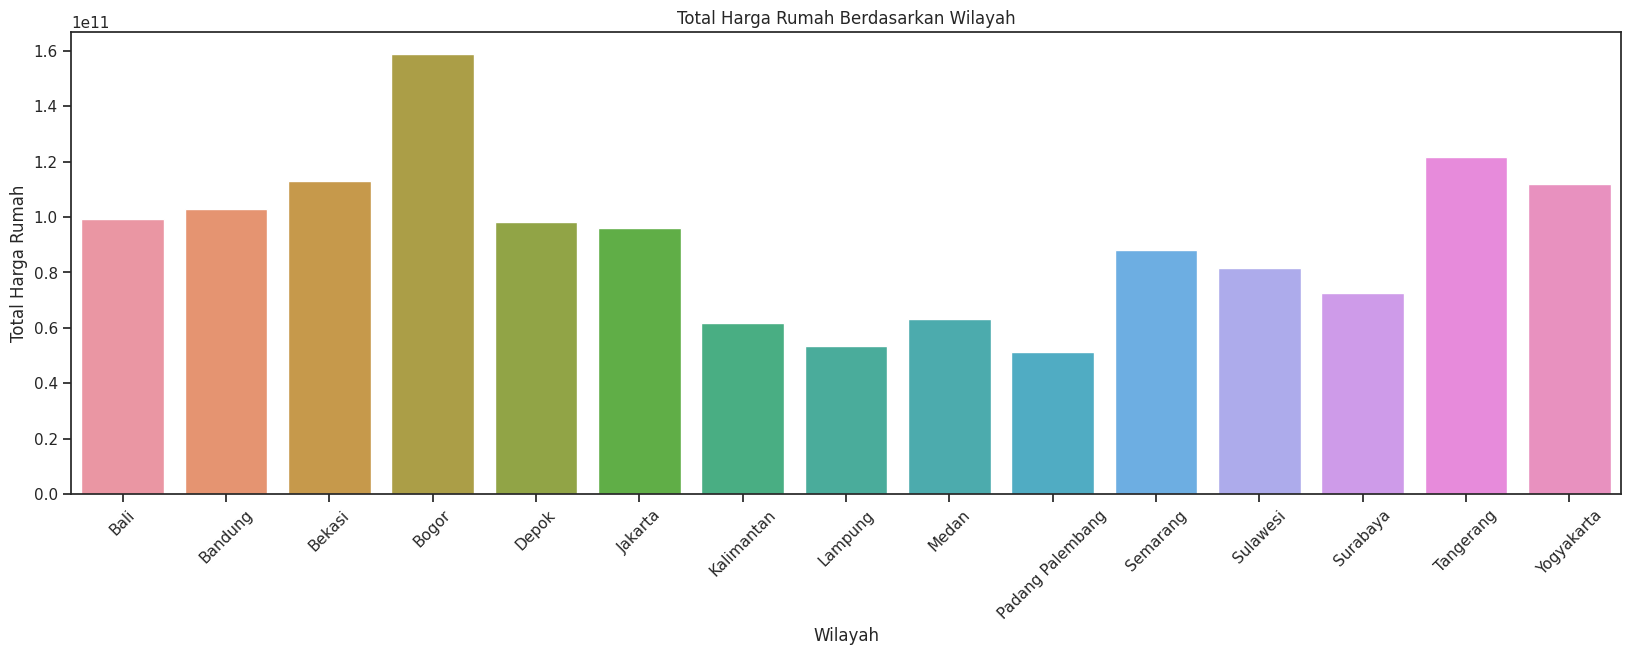

In [ ]:
# Menghitung total harga rumah per wilayah
total_harga_perwilayah = df_cleaned.groupby('wilayah')['harga'].sum().reset_index()

# membuat bar plot
plt.figure(figsize=(20, 6))
sns.barplot(x='wilayah', y='harga', data=total_harga_perwilayah)

# menambahkan judul dan label sumbu x,y
plt.title('Total Harga Rumah Berdasarkan Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Total Harga Rumah')
# Memutar label sumbu x untuk memastikan kejelasan
plt.xticks(rotation=45)
# menampilkan plot
plt.show()

# 5. Rumah dengan karakteristik seperti apa yang paling banyak dijual?

In [ ]:
#Jumlah kamar mandi dan kamar tidur

In [ ]:
cont1 = pd.crosstab(df_cleaned['KM'], df_cleaned['KT'])
cont1

KT   0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0
KM                                         
0.0    0    0    1    0    0    0    0    0
1.0    4   15  532   51    2    2    0    0
2.0    0    3  134  311   63    6    2    2
3.0    0    0    8  112   64   11    3    3
4.0    0    0    0    5   23   17    2    0
5.0    0    0    0    0    4    3    1    0
7.0    0    0    0    0    0    0    0    1

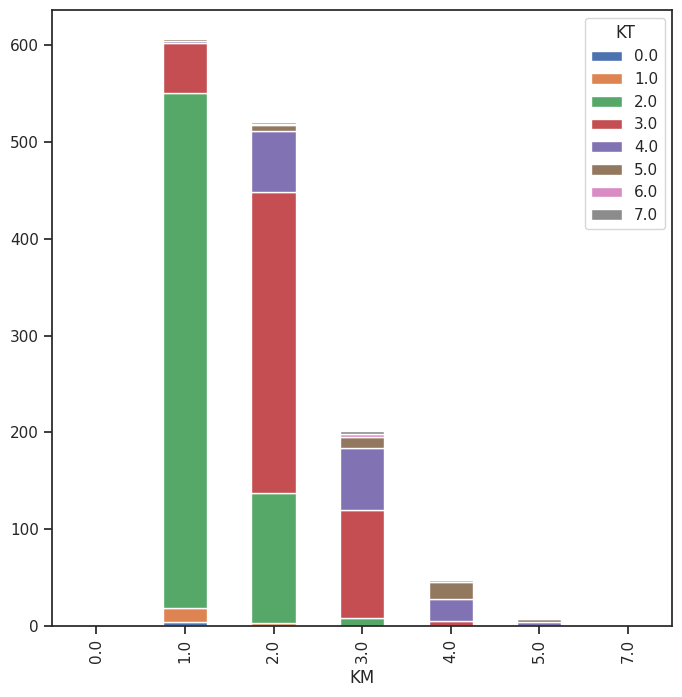

In [ ]:
CT = pd.crosstab(index=df_cleaned["KM"], columns=df_cleaned["KT"])
p = CT.plot(kind="bar", figsize=(8,8), stacked=True)


Dapat diperhatikan bahwa bar yang paling tinggi adalah berwarna hijau, yaitu rumah dengan 2 kamar tidur dan 1 kamar mandi.


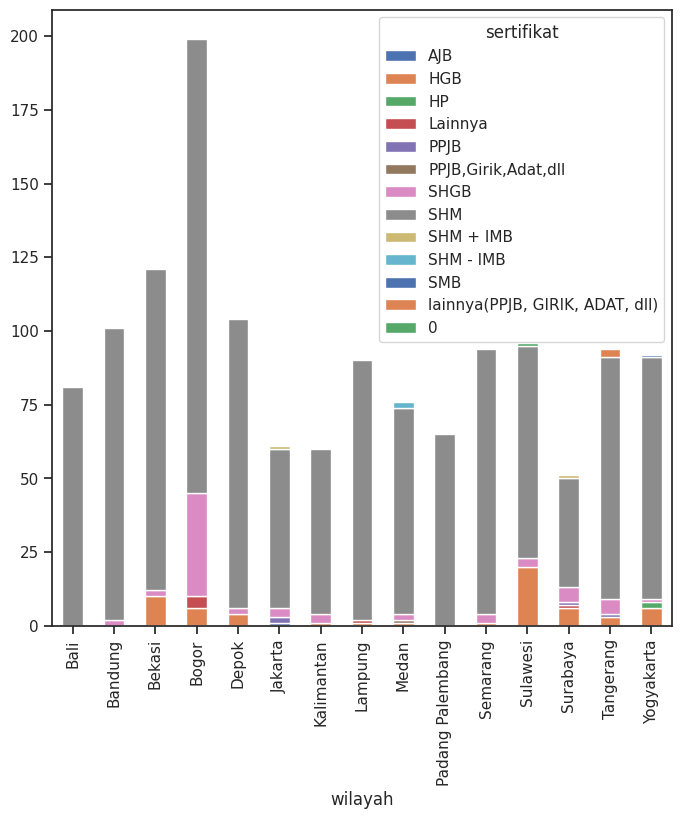

In [ ]:
#Jumlah sertifikat berdasarkan wilayah
CT = pd.crosstab(index=df_cleaned["wilayah"], columns=df_cleaned["sertifikat"])
p = CT.plot(kind="bar", figsize=(8,8), stacked=True)

Disetiap wilayah didominasi oleh sertifikat dengan jenis SHM.

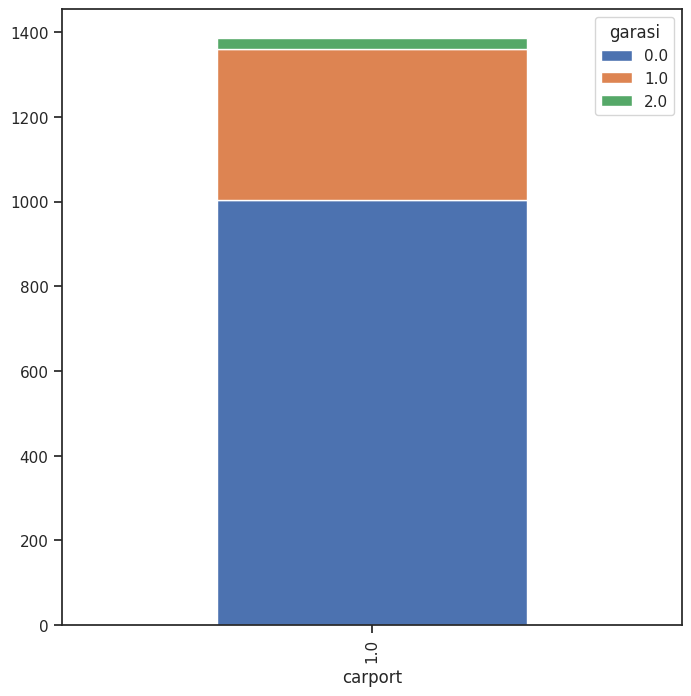

In [ ]:
#garasi dan carport
CT = pd.crosstab(index=df_cleaned["carport"], columns=df_cleaned["garasi"])
p = CT.plot(kind="bar", figsize=(8,8), stacked=True)

Penjualan rumah paling banyak adalah rumah dengan carport 1 tetapi tidak memiliki garasi

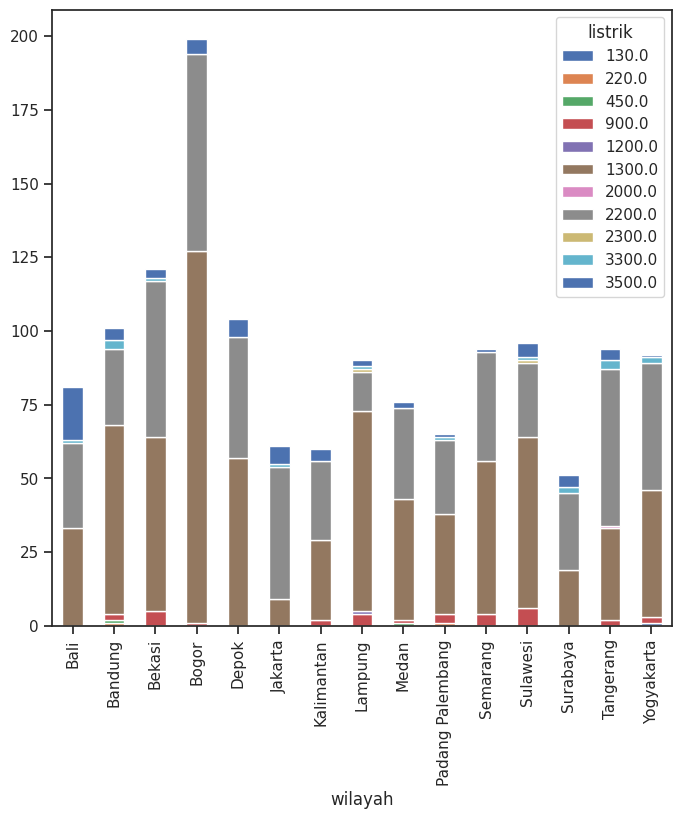

In [ ]:
#listrik
CT = pd.crosstab(index=df_cleaned["wilayah"], columns=df_cleaned["listrik"])
p = CT.plot(kind="bar", figsize=(8,8), stacked=True)

Daya listrik yang lebih dominan adalah rumah dengan listrik 1300 watt dan 2200 watt

Dari grafik-grafik diatas dapat disimpulkan karakteristik rumah yang paling banyak dijual sebagai berikut :
1. rumah yang memiliki kombinasi kamar tidur 2 dan kamar mandi 1. Hal ini bisa kita telusuri lagi apakah rumah dengan kombinasi ini memiliki harga yang lebih terjangkau yang bisa menjadi faktor kenapa properti dengan karakteristik ini banyak dijual.
2. rumah dengan sertifikat SHM. Disetiap wilayah sertifikat dengan jenis SHM yang paling banyak dijual jika dibandingkan jenis lainnya. Akan tetapi, rumah dengan SHM ini juga memiliki harga yang bervariasi. Oleh karena itu, kita dapat melakukan analisis lebih lanjut apakah rumah dengan SHM akan lebih mahal dibandingkan yang lainnya dan apakah berdampak pada keuntungan penjualan.
3. rumah dengan 1 carport tanpa bagasi. Kita bisa melakukan anlisis lebih lanjut pengaruh karakteristik ini dengan harga yang ditawarkan, apakah rumah rumah dengan carport tanpa garasi harganya akan lebih terjangkau dibandingkan rumah yang bergarasi
4. rumah dengan listrik 1300 dan 2200 watt. Rumah-rumah yang menggunakan listrik dengan kapasitas 1300 dan 2200 watt cenderung lebih dominan di setiap wilayah. Hal ini berarti bahwa preferensi untuk kapasitas daya listrik tertentu mungkin berkaitan dengan karakteristik atau kebutuhan khusus di wilayah tersebut.

#6. Jika RPPI ingin melakukan investasi (max) Rp. 25 Milyar minggu besok, apakah dari data anda dapat memberikan rekomendasi rumah mana saja yang akan berpotensi menghasilkan keuntungan bagi perusahaan?

Pada bagian ini, kami akan melihat sebuah estimasi variabel yang disebut NJOP. Nilai Jual objek Pajak (NJOP) merupakan harga rata-rata yang diperoleh melalui transaksi jual beli. Pada analisis kali ini, kami menggunakan estimasi sederhana, yaitu dengan membagi harga rumah dengan jumlahan luas tanah dan luas bangunan

In [ ]:
data['NJOP'] = data['harga']/(data['LT'] + data['LB'])

In [ ]:
import plotly.express as px

median_njop_by_wilayah = data.groupby('wilayah')['NJOP'].median().reset_index()
median_njop_by_wilayah = median_njop_by_wilayah.sort_values(by='NJOP', ascending=True)
outlier_threshold = data['NJOP'].quantile(0.99)
filtered_data = data[data['NJOP'] <= outlier_threshold]

grouped_plot = px.box(filtered_data, x="wilayah", y="NJOP", color='wilayah',
                      category_orders={"wilayah": median_njop_by_wilayah['wilayah']})

grouped_plot.show()


Gambar di atas menunjukkan persebaran estimasi NJOP pada seluruh wilayah yang diurutkan berdasarkan mediannya. Selanjutnya, kami melihat rumah mana saja yang memiliki estimasi NJOP terendah untuk setiap wilayah pada tahun 2023.

In [ ]:
filtered_data = data[data['created_at'].dt.year == 2023]
grouped_njop = filtered_data.sort_values(by='NJOP').groupby('wilayah')

grouped_10 = grouped_njop.head(10)

In [ ]:
median_njop_by_wilayah_10 = grouped_10.groupby('wilayah')['NJOP'].median().reset_index()
median_njop_by_wilayah_10 = median_njop_by_wilayah_10.sort_values(by='NJOP', ascending=True)

grouped_plot = px.box(grouped_10, x="wilayah", y="NJOP", color='wilayah', category_orders={"wilayah": median_njop_by_wilayah_10['wilayah']})
grouped_plot.show()

In [ ]:
!gdown 1TFrwh69wr7U2OXJ8TEuPPGIyblCA8BQr

Downloading...
From: https://drive.google.com/uc?id=1TFrwh69wr7U2OXJ8TEuPPGIyblCA8BQr
To: /content/ten_lowest_NJOP_2023_fix.xlsx
100% 40.1k/40.1k [00:00<00:00, 121MB/s]


Kemudian, akan dicek satu-persatu dari iklan rumah ini, apakah rumah tersebut sudah terjual atau belum.

In [ ]:
njop_10 = pd.read_excel('/content/ten_lowest_NJOP_2023_fix.xlsx')
njop_10.head()

wilayah created_at   LT   LB  KT  KM  garasi  carport  \
0     Lampung 2023-04-07   72   36   2   1       0        0   
1  Yogyakarta 2023-08-30   78   40   2   1       0        2   
2   Tangerang 2023-09-21  216  200   4   4       1        2   
3  Kalimantan 2023-08-18  215   40   2   0       0        0   
4  Kalimantan 2023-06-06  814  217   4   2       0        0   

                                           lokasi sertifikat  listrik  \
0                            Pringsewu, Pringsewu        SHM     1300   
1                                          Sleman        SHM     1300   
2                                  GADING SERPONG        SHM     4400   
3  Landasan Ulin, Banjar Baru, Kalimantan Selatan        SHM      900   
4                        Jekan Raya, Palangkaraya        SHM     1300   

     hadap      harga                                                URL  \
0  unknown   30000000  https://www.rumah123.com/properti/pringsewu/ho...   
1  unknown   40000000  https://www.rumah.com/listing-properti/dijual-...   
2  unknown  170000000  https://www.rumah.com/listing-properti/dijual-...   
3  unknown  195000000  https://www.rumah.com/listing-properti/dijual-...   
4  unknown  850000000  https://www.rumah123.com/properti/palangkaraya...   

                                           deskripsi  Estimasi NJOP Baru/Tua  \
0  Rumah Dijual Pringsewu Rumah di jual dengan ta...  277777.777778      NaN   
1  Dekat exit tol dan univeritas tiga ternama\n\n...  338983.050847      NaN   
2  Cluster San Lorenzo Illago 2 lantai Lt 216 (12...  408653.846154      NaN   
3  Dijual rumah sederhana di Komplek Sumber Cahay...  764705.882353     Baru   
4  Rumah Dijual Palangkaraya Dijual Rumah Tanah L...  824442.289040      Tua   

       Strategis Unnamed: 18  
0            NaN         NaN  
1            NaN         NaN  
2            NaN         NaN  
3        Bandara         NaN  
4  Penyangga IKN         NaN

In [ ]:
filtered_njop_10 = njop_10.dropna(subset=["Baru/Tua"])
filtered_njop_10

wilayah created_at   LT   LB  KT  KM  garasi  carport  \
3    Kalimantan 2023-08-18  215   40   2   0       0        0   
4    Kalimantan 2023-06-06  814  217   4   2       0        0   
5    Kalimantan 2023-07-06  144   36   2   1       0        0   
6        Bekasi 2023-06-06  180  240   4   3       0        1   
10     Sulawesi 2023-09-14  102   72   2   1       0        1   
..          ...        ...  ...  ...  ..  ..     ...      ...   
142     Jakarta 2023-06-07  120  135   3   3       1        1   
143     Jakarta 2023-06-07   60   75   3   2       0        2   
144     Jakarta 2023-06-06  223  314   3   2       1        1   
145     Jakarta 2023-06-06   19   36   2   2       0        0   
149     Jakarta 2023-06-07   90   80   3   2       2        2   

                                             lokasi sertifikat  listrik  \
3    Landasan Ulin, Banjar Baru, Kalimantan Selatan        SHM      900   
4                          Jekan Raya, Palangkaraya        SHM     1300   
5                        Sungai Ambawang, Kubu Raya        SHM     2200   
6                                       Mustikajaya        SHM     3500   
10              Puuwatu, Kendari. Sulawesi Tenggara        HGB      900   
..                                              ...        ...      ...   
142                      Kota Wisata, Jakarta Timur        SHM     2200   
143                        Cilangkap, Jakarta Timur        SHM     2200   
144                                   Jakarta Pusat        SHM     5500   
145                                   Jakarta Pusat        SHM     2200   
149                          Cibubur, Jakarta Timur        SHM     2200   

       hadap       harga                                                URL  \
3    unknown   195000000  https://www.rumah.com/listing-properti/dijual-...   
4    unknown   850000000  https://www.rumah123.com/properti/palangkaraya...   
5    unknown   155000000  https://www.rumah123.com/properti/kubu-raya/ho...   
6      Utara   370000000      Rumah Lelang Bri, Mustika Jaya | Rumah123.com   
10     Utara   175000000  https://www.99.co/id/properti/rumah-dijual-175...   
..       ...         ...                                                ...   
142  unknown  1650000000  https://www.rumah123.com/properti/jakarta-timu...   
143  Selatan   900000000  https://www.rumah123.com/properti/jakarta-timu...   
144    Utara  3700000000  Rumah 2 Lantai, Luas Tanah diatas 220m2 di Dwi...   
145  unknown   388000000  https://www.rumah123.com/properti/jakarta-pusa...   
149  unknown  1300000000  https://www.rumah123.com/properti/jakarta-timu...   

                                             deskripsi  Estimasi NJOP  \
3    Dijual rumah sederhana di Komplek Sumber Cahay...   7.647059e+05   
4    Rumah Dijual Palangkaraya Dijual Rumah Tanah L...   8.244423e+05   
5    Harga mulai dari 155 juta, bisa cash tempo den...   8.611111e+05   
6    Kav.no.e10-04 Setempat Dikenal Sebagai (peruma...   8.809524e+05   
10   PERUMAHAN AFIKA LAND & AFIKA RESIDENCE TIPE 36...   1.005747e+06   
..                                                 ...            ...   
142  Rumah 2 lantai asri & menarik di Kota Wisata, ...   6.470588e+06   
143  Dijual Rumah Dengan Desain Cantik Cocok Untuk ...   6.666667e+06   
144  Dijual Rumah Luas Tanah di atas 220 m2, di Dwi...   6.890130e+06   
145  Rumah 2 lantai murah nan manis.desain minimali...   7.054545e+06   
149  Rumah Mewah dengan dinding bata merah Ready Si...   7.647059e+06   

    Baru/Tua      Strategis              Unnamed: 18  
3       Baru        Bandara                      NaN  
4        Tua  Penyangga IKN                      NaN  
5       Baru  Penyangga IKN  Rencana pembangunan tol  
6        Tua            NaN                      NaN  
10      Baru            NaN                      NaN  
..       ...            ...                      ...  
142     Baru            NaN                      NaN  
143     Baru            NaN                      NaN  
144  

In [ ]:
import plotly.express as px

fig = px.histogram(filtered_njop_10, x='wilayah', title='Count Plot dari Setiap Wilayah')
fig.update_xaxes(title_text='Wilayah')
fig.update_yaxes(title_text='Count')
fig.show()

Gambar di atas menunjukkan jumlah rumah pada setiap wilayah yang belum terjual. Kami juga menambahkan variabel penanda baru, yang menunjukkan apakah rumah tersebut terlihat baru (atau memiliki keterangan baru dibangun) atau terlihat tua.

In [ ]:
filtered_njop_10['harga'].sum()

76207000000

Jakarta, sebuah kota bisnis dan ibukota layak dipertimbangkan dalam investasi. Berikut rekomendasi rumah pada wilayah Jakarta, berdasarkan estimasi NJOP terkecil:

In [ ]:
filtered_njop_jak = filtered_njop_10[(filtered_njop_10['wilayah'] == 'Jakarta')]
sorted_jak = filtered_njop_jak.sort_values(by="Estimasi NJOP", ascending=True)

accumulated_sum = 0
filtered_rows = []

for index, row in sorted_jak.iterrows():
    if accumulated_sum + row["harga"] <= 10000000000:
        filtered_rows.append(row)
        accumulated_sum += row["harga"]
    else:
        break

result_njop_jak = pd.DataFrame(filtered_rows)

In [ ]:
result_njop_jak

wilayah created_at   LT   LB  KT  KM  garasi  carport  \
140  Jakarta 2023-06-06  135  106   3   1       0        0   
141  Jakarta 2023-06-06   68   72   2   2       1        1   
142  Jakarta 2023-06-07  120  135   3   3       1        1   
143  Jakarta 2023-06-07   60   75   3   2       0        2   
144  Jakarta 2023-06-06  223  314   3   2       1        1   
145  Jakarta 2023-06-06   19   36   2   2       0        0   

                         lokasi sertifikat  listrik    hadap       harga  \
140               Jakarta Pusat        SHM     1300    Barat  1420000000   
141               Jakarta Pusat        SHM     2200    Utara   897000000   
142  Kota Wisata, Jakarta Timur        SHM     2200  unknown  1650000000   
143    Cilangkap, Jakarta Timur        SHM     2200  Selatan   900000000   
144               Jakarta Pusat        SHM     5500    Utara  3700000000   
145               Jakarta Pusat        SHM     2200  unknown   388000000   

                                                   URL  \
140  https://www.rumah123.com/properti/jakarta-pusa...   
141  Rumah mewah di Jl.Baladewa Tanah tinggi Jakart...   
142  https://www.rumah123.com/properti/jakarta-timu...   
143  https://www.rumah123.com/properti/jakarta-timu...   
144  Rumah 2 Lantai, Luas Tanah diatas 220m2 di Dwi...   
145  https://www.rumah123.com/properti/jakarta-pusa...   

                                             deskripsi  Estimasi NJOP  \
140  Dijual Rumah Lelang Bri, Kemayoran, Jakarta Pusat   5.892116e+06   
141  Rumah Elite & Mewah serta futuristik bergaya e...   6.407143e+06   
142  Rumah 2 lantai asri & menarik di Kota Wisata, ...   6.470588e+06   
143  Dijual Rumah Dengan Desain Cantik Cocok Untuk ...   6.666667e+06   
144  Dijual Rumah Luas Tanah di atas 220 m2, di Dwi...   6.890130e+06   
145  Rumah 2 lantai murah nan manis.desain minimali...   7.054545e+06   

    Baru/Tua  Strategis  Unnamed: 18  
140      Tua        NaN          NaN  
141     Baru        NaN          NaN  
142     Baru        NaN          NaN  
143     Baru        NaN          NaN  
144      Tua        NaN          NaN  
145     Baru        NaN          NaN

Berikut visualisasinya (Mouse dapat dihover ke titik untuk menampilkan informasi tambahan):

In [ ]:
import plotly.express as px

fig = px.scatter(result_njop_jak, x='Estimasi NJOP', y='harga',
                 title='Scatter Plot of Estimasi NJOP vs. Harga',
                 hover_name='deskripsi')
fig.update_xaxes(title_text='Estimasi NJOP')
fig.update_yaxes(title_text='Harga')
fig.update_traces(marker=dict(size=20))
fig.show()

Perhatikan pada gambar di atas bahwa rekomendasi rumah kami memiliki estimasi NJOP di bawah 7.1 Juta per $m^2$

In [ ]:
data_jakarta = data[(data['wilayah'] == 'Jakarta') & (data['created_at'].dt.year == 2023)]

# Create a boxplot of the 'NJOP' column for 'Jakarta Pusat' in 2023 using Plotly Express
fig = px.box(data_jakarta, x='NJOP', title='Boxplot of NJOP di Jakarta (2023)')
fig.update_xaxes(title_text='NJOP')
fig.show()

Jika dibandingkan pada keseluruhan data rumah tahun 2023 di Jakarta, kami melihat bahwa rekomendasi kami cukup baik, karena estimasi NJOPnya berada di bagian yang sangat bawah dari keseluruhan persebaran estimasi NJOP di Jakarta.


Berikutnya, untuk investasi lainnya, jika dari client memiliki tenaga kerja yang memungkinkan untuk meng-handle rumah di daerah-daerah lain,kami sarankan untuk investasi ke beberapa rumah ini (juga berdasarkan estimasi NJOP yang rendah):

In [ ]:
filtered_njop_non_jak = filtered_njop_10[(filtered_njop_10['wilayah'] != 'Jakarta')]
sorted_non_jak = filtered_njop_non_jak.sort_values(by="Estimasi NJOP", ascending=True)

accumulated_sum = 0
filtered_rows = []

for index, row in sorted_non_jak.iterrows():
    if accumulated_sum + row["harga"] <= 5000000000:
        filtered_rows.append(row)
        accumulated_sum += row["harga"]
    else:
        break

result_njop_non_jak = pd.DataFrame(filtered_rows)

In [ ]:
result_njop_non_jak

wilayah created_at   LT   LB  KT  KM  garasi  carport  \
3         Kalimantan 2023-08-18  215   40   2   0       0        0   
4         Kalimantan 2023-06-06  814  217   4   2       0        0   
5         Kalimantan 2023-07-06  144   36   2   1       0        0   
6             Bekasi 2023-06-06  180  240   4   3       0        1   
10          Sulawesi 2023-09-14  102   72   2   1       0        1   
11  Padang Palembang 2023-09-21  450  180   3   2       2        0   
12          Semarang 2023-07-06  288  128   3   1       0        0   
13           Lampung 2023-06-06  375  300   5   4       1        0   
14        Kalimantan 2023-08-26  200   45   2   1       0        1   
15        Kalimantan 2023-09-16  300  200   3   3       0        2   
16          Sulawesi 2023-06-06  138  276   3   2       1        0   

                                               lokasi sertifikat  listrik  \
3      Landasan Ulin, Banjar Baru, Kalimantan Selatan        SHM      900   
4                            Jekan Raya, Palangkaraya        SHM     1300   
5                          Sungai Ambawang, Kubu Raya        SHM     2200   
6                                         Mustikajaya        SHM     3500   
10                Puuwatu, Kendari. Sulawesi Tenggara        HGB      900   
11                                Sukarami, Palembang        SHM     1300   
12                          Semarang Tengah, Semarang        SHM     1300   
13                 Gunung Terang, Tulang Bawang Barat        SHM     1300   
14  Jl. Perintis, Pahandut, Palangka Raya, Kaliman...        SHM     1300   
15  Swadaya, Banjar Baru Selatan, Banjar Baru, Kal...        SHM     3500   
16                                 Tamalate, Makassar        SHM     1300   

      hadap      harga                                                URL  \
3   unknown  195000000  https://www.rumah.com/listing-properti/dijual-...   
4   unknown  850000000  https://www.rumah123.com/properti/palangkaraya...   
5   unknown  155000000  https://www.rumah123.com/properti/kubu-raya/ho...   
6     Utara  370000000      Rumah Lelang Bri, Mustika Jaya | Rumah123.com   
10    Utara  175000000  https://www.99.co/id/properti/rumah-dijual-175...   
11  unknown  650000000  https://www.rumah.com/listing-properti/dijual-...   
12  Selatan  450000000  https://www.rumah123.com/properti/semarang/hos...   
13    Utara  750000000  https://www.rumah123.com/properti/tulang-bawan...   
14  unknown  285000000  https://www.rumah.com/listing-properti/dijual-...   
15  unknown  600000000  https://www.rumah.com/listing-properti/dijual-...   
16  unknown  500000000  https://www.rumah123.com/properti/makassar/hos...   

                                            deskripsi  Estimasi NJOP Baru/Tua  \
3   Dijual rumah sederhana di Komplek Sumber Cahay...   7.647059e+05     Baru   
4   Rumah Dijual Palangkaraya Dijual Rumah Tanah L...   8.244423e+05      Tua   
5   Harga mulai dari 155 juta, bisa cash tempo den...   8.611111e+05     Baru   
6   Kav.no.e10-04 Setempat Dikenal Sebagai (peruma...   8.809524e+05      Tua   
10  PERUMAHAN AFIKA LAND & AFIKA RESIDENCE TIPE 36...   1.005747e+06     Baru   
11  Rumah Nyaman di Lokasi Strategis Hanya Rp. 650...   1.031746e+06      Tua   
12  Rumah nyaman asri ditengah kota. Aset Lelang p...   1.081731e+06      Tua   
13  Rumah Murah Banget Jl. Purnawirawan, Gunung Te...   1.111111e+06      Tua   
14                                                NaN   1.163265e+06     Baru   
15  Rumah minimalis dijual. Bangunan 1 lantai. Lok...   1.200000e+06     Baru   
16  Satu Unit Rumah Tinggal 2 (dua) Lantai, tereta...   1.207729e+06      Tua   

        Strategis              Unnamed: 18  
3         Bandara                      NaN  
4   Penyangga IKN                      NaN  
5   Penyangga IKN  Rencana pembangunan tol  
6             NaN                      NaN  
10            NaN                      NaN  
11     Pusat Kota                      NaN  
12     Pusat Kota                 

Berikut adalah count dari tiap wilayah untuk rekomendasi kami dan persebaran harga vs NJOP-nya:

In [ ]:
import plotly.express as px

fig = px.histogram(result_njop_non_jak, x='wilayah', title='Count Plot dari Setiap Wilayah', color='wilayah')
fig.update_xaxes(title_text='Wilayah')
fig.update_yaxes(title_text='Count')
fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter(result_njop_non_jak, x='Estimasi NJOP', y='harga',
                 title='Scatter Plot of Estimasi NJOP vs. Harga',
                 hover_name='deskripsi',
                 color = 'wilayah')
fig.update_xaxes(title_text='Estimasi NJOP')
fig.update_yaxes(title_text='Harga')
fig.update_traces(marker=dict(size=20))
fig.show()

Untuk merekap, berikut adalah kumpulan rekomendasi rumah kami, berdasarkan estimasi NJOP terendah sebelumnya:

In [ ]:
appended_rekom = pd.concat([result_njop_jak, result_njop_non_jak], ignore_index=True)
appended_rekom

wilayah created_at   LT   LB  KT  KM  garasi  carport  \
0            Jakarta 2023-06-06  135  106   3   1       0        0   
1            Jakarta 2023-06-06   68   72   2   2       1        1   
2            Jakarta 2023-06-07  120  135   3   3       1        1   
3            Jakarta 2023-06-07   60   75   3   2       0        2   
4            Jakarta 2023-06-06  223  314   3   2       1        1   
5            Jakarta 2023-06-06   19   36   2   2       0        0   
6         Kalimantan 2023-08-18  215   40   2   0       0        0   
7         Kalimantan 2023-06-06  814  217   4   2       0        0   
8         Kalimantan 2023-07-06  144   36   2   1       0        0   
9             Bekasi 2023-06-06  180  240   4   3       0        1   
10          Sulawesi 2023-09-14  102   72   2   1       0        1   
11  Padang Palembang 2023-09-21  450  180   3   2       2        0   
12          Semarang 2023-07-06  288  128   3   1       0        0   
13           Lampung 2023-06-06  375  300   5   4       1        0   
14        Kalimantan 2023-08-26  200   45   2   1       0        1   
15        Kalimantan 2023-09-16  300  200   3   3       0        2   
16          Sulawesi 2023-06-06  138  276   3   2       1        0   

                                               lokasi sertifikat  listrik  \
0                                       Jakarta Pusat        SHM     1300   
1                                       Jakarta Pusat        SHM     2200   
2                          Kota Wisata, Jakarta Timur        SHM     2200   
3                            Cilangkap, Jakarta Timur        SHM     2200   
4                                       Jakarta Pusat        SHM     5500   
5                                       Jakarta Pusat        SHM     2200   
6      Landasan Ulin, Banjar Baru, Kalimantan Selatan        SHM      900   
7                            Jekan Raya, Palangkaraya        SHM     1300   
8                          Sungai Ambawang, Kubu Raya        SHM     2200   
9                                         Mustikajaya        SHM     3500   
10                Puuwatu, Kendari. Sulawesi Tenggara        HGB      900   
11                                Sukarami, Palembang        SHM     1300   
12                          Semarang Tengah, Semarang        SHM     1300   
13                 Gunung Terang, Tulang Bawang Barat        SHM     1300   
14  Jl. Perintis, Pahandut, Palangka Raya, Kaliman...        SHM     1300   
15  Swadaya, Banjar Baru Selatan, Banjar Baru, Kal...        SHM     3500   
16                                 Tamalate, Makassar        SHM     1300   

      hadap       harga                                                URL  \
0     Barat  1420000000  https://www.rumah123.com/properti/jakarta-pusa...   
1     Utara   897000000  Rumah mewah di Jl.Baladewa Tanah tinggi Jakart...   
2   unknown  1650000000  https://www.rumah123.com/properti/jakarta-timu...   
3   Selatan   900000000  https://www.rumah123.com/properti/jakarta-timu...   
4     Utara  3700000000  Rumah 2 Lantai, Luas Tanah diatas 220m2 di Dwi...   
5   unknown   388000000  https://www.rumah123.com/properti/jakarta-pusa...   
6   unknown   195000000  https://www.rumah.com/listing-properti/dijual-...   
7   unknown   850000000  https://www.rumah123.com/properti/palangkaraya...   
8   unknown   155000000  https://www.rumah123.com/properti/kubu-raya/ho...   
9     Utara   370000000      Rumah Lelang Bri, Mustika Jaya | Rumah123.com   
10    Utara   175000000  https://www.99.co/id/properti/rumah-dijual-175...   
11  unknown   650000000  https://www.rumah.com/listing-properti/dijual-...   
12  Selatan   450000000  https://www.rumah123.com/properti/semarang/hos...   
13    Utara   750000000  https://www.rumah123.com/properti/tulang-bawan...   
14  unknown   285000000  https://www.rumah.com/listing-properti/dijual-...   
15  unknown   600000000  https://www.rumah.com/listing-properti/dijual-...   
16  unknown   500000000  https://www.ru

In [ ]:
import plotly.express as px

fig = px.histogram(appended_rekom, x='wilayah', title='Count Plot dari Setiap Wilayah', color='wilayah')
fig.update_xaxes(title_text='Wilayah')
fig.update_yaxes(title_text='Count')
fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter(appended_rekom, x='Estimasi NJOP', y='harga',
                 title='Scatter Plot of Estimasi NJOP vs. Harga',
                 hover_name='deskripsi',
                 color = 'wilayah')
fig.update_xaxes(title_text='Estimasi NJOP')
fig.update_yaxes(title_text='Harga')
fig.update_traces(marker=dict(size=20))
fig.show()

# 7. Dan yang terpenting, informasi berharga apa lagi yang bisa anda dapatkan dari data?

##Informasi Tambahan 1

Berdasarakan rumah.com, rumah lelang adalah hunian yang menjadi sitaan bank akibat debitur tidak dapat membayar atau melunasi cicilan. Meskipun berstatus rumah second, harga rumah lelang biasanya dipatok lebih rendah hingga 10 persen dari harga pasar. Hal ini dapat menjadi opportunity bagi client untuk mendapatkan rumah dengan harga yang di bawah harga pasar. Akan dianalisis lebih lanjut untuk permasalahan ini.

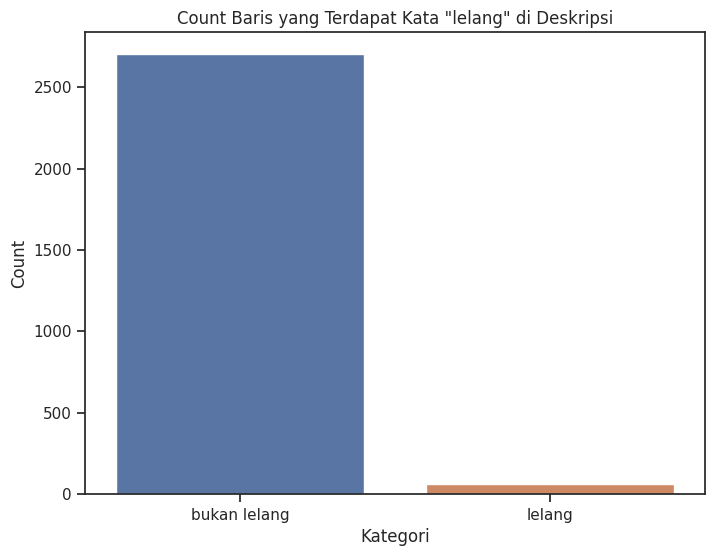

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data ['deskripsi'] = data['deskripsi'].astype(str)
data['lelang'] = data['deskripsi'].apply(lambda x: 'lelang' if 'lelang' in x.lower() else 'bukan lelang')

plt.figure(figsize=(8, 6))
sns.countplot(data=data , x='lelang')
plt.xlabel('Kategori')
plt.ylabel('Count')
plt.title('Count Baris yang Terdapat Kata "lelang" di Deskripsi')
plt.show()

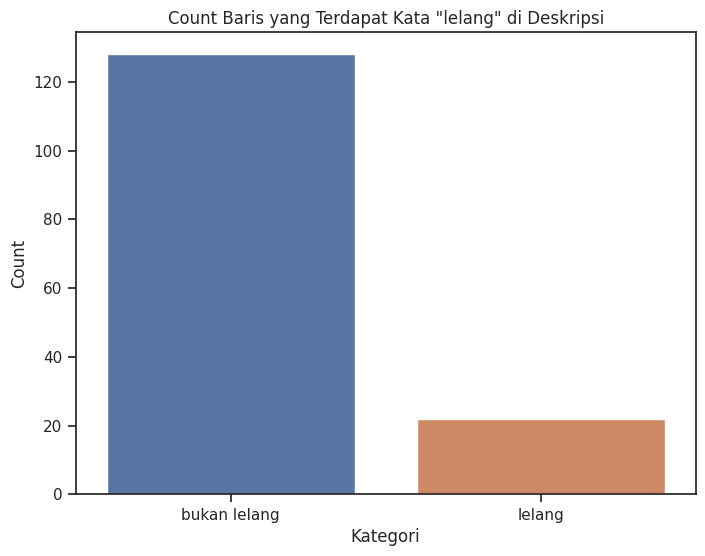

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

grouped_10 ['deskripsi'] = grouped_10 ['deskripsi'].astype(str)
grouped_10 ['lelang'] = grouped_10 ['deskripsi'].apply(lambda x: 'lelang' if 'lelang' in x.lower() else 'bukan lelang')

plt.figure(figsize=(8, 6))
sns.countplot(data=grouped_10 , x='lelang')
plt.xlabel('Kategori')
plt.ylabel('Count')
plt.title('Count Baris yang Terdapat Kata "lelang" di Deskripsi')
plt.show()

Terliaht bahwa proporsi iklan rumah lelang lebih besar saat estimasi NJOP-nya rendah (Kami melihat kembali 10 rumah dengan estimasi NJOP terendah pada setiap wilayah). Kemudian akan dilanjutkan untuk melihat persebaran estimasi NJOP untuk rumah lelang vs tidak.


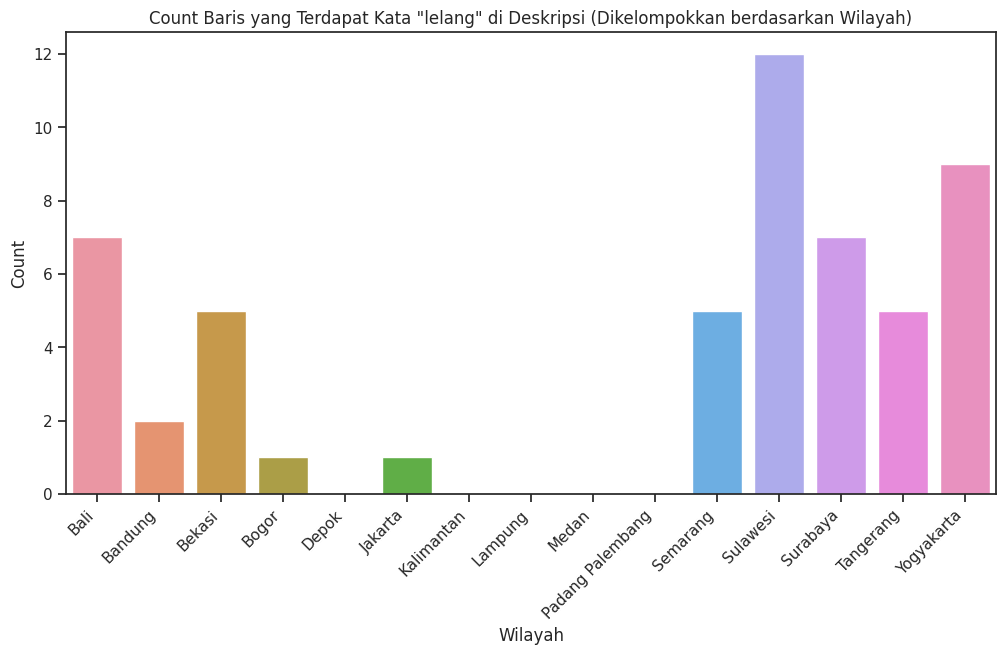

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data['deskripsi'] = data['deskripsi'].astype(str)
data['lelang'] = data['deskripsi'].apply(lambda x: 'lelang' if 'lelang' in x.lower() else 'bukan lelang')
lelang_counts = data.groupby('wilayah')['lelang'].value_counts().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=data[(data['lelang'] == 'lelang') & (data['created_at'].dt.year == 2023)], x='wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Count')
plt.title('Count Baris yang Terdapat Kata "lelang" di Deskripsi (Dikelompokkan berdasarkan Wilayah)')
plt.xticks(rotation=45, ha='right')

plt.show()

Jika dilihat, pada tahun 2023, top 3 jumlah iklan rumah lelang terbanyak berada di wilayah Surabaya, Yogyakarta, dan Bali. Kemudian, akan dilihat persebaran estimasi NJOP-nya.

In [ ]:
median_lelang = data.groupby('lelang')['NJOP'].median().reset_index()
outlier_threshold = data['NJOP'].quantile(0.96)
filtered_data = data[data['NJOP'] <= outlier_threshold]
filtered_data= filtered_data.sort_values(by='NJOP', ascending=True)

grouped_plot = px.box(filtered_data, x="lelang", y="NJOP", color='lelang', category_orders={"lelang": median_lelang['lelang']})
grouped_plot.update_layout(
    title='Persebaran Estimasi NJOP untuk Rumah Non-Lelang vs Lelang'
)
grouped_plot.show()

Dapat dilihat bahwa median estimasi NJOP rumah lelang lebih rendah jika kita lihat keseluruhan wilayah. Hal ini bisa saja disebabkan karena tidak terdapat banyak iklan lelang di wilayah-wilayah tertentu. Maka dari itu, akan diselidiki sebaran estimasi NJOP per wilayah.

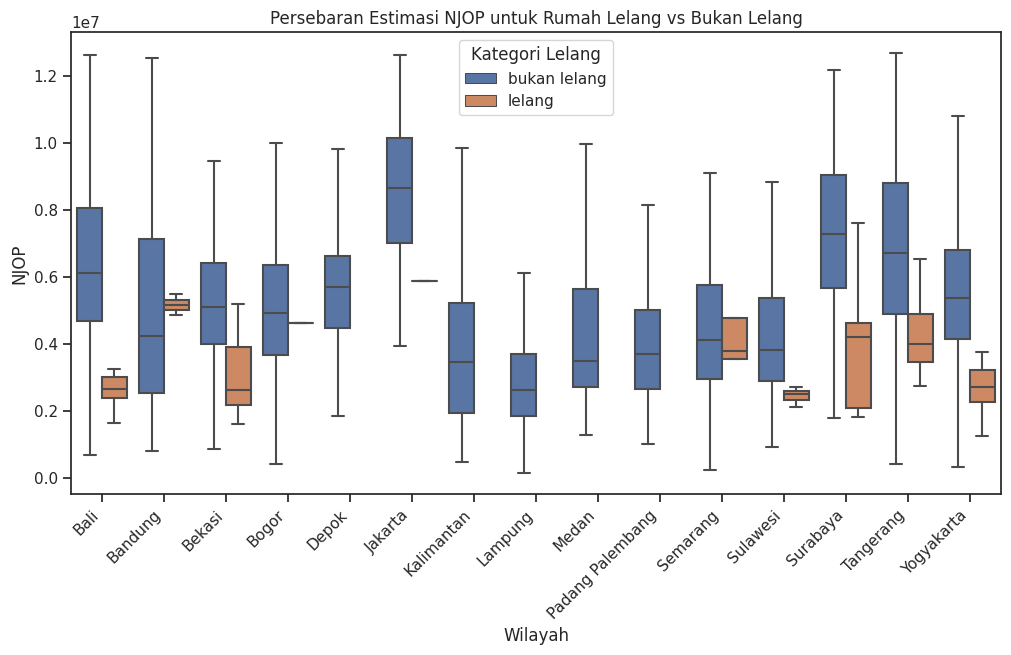

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded your data into the 'data' DataFrame

# Calculate the median NJOP for 'lelang' and 'bukan lelang'
median_lelang = data.groupby('lelang')['NJOP'].median().reset_index()

# Define the outlier threshold
outlier_threshold = data['NJOP'].quantile(0.96)

# Filter the data to exclude outliers
filtered_data = data[data['NJOP'] <= outlier_threshold]

# Sort the filtered data by 'NJOP' in ascending order
filtered_data = filtered_data.sort_values(by='NJOP', ascending=True)

# Create a grouped box plot using seaborn
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=filtered_data, x='wilayah', y='NJOP', hue='lelang', showfliers=False)
plt.xlabel('Wilayah')
plt.ylabel('NJOP')
plt.title('Persebaran Estimasi NJOP untuk Rumah Lelang vs Bukan Lelang')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.legend(title='Kategori Lelang')
plt.show()


Dapat dilihat untuk estimasi NJOP per wilayah. Rumah lelang cenderung memiliki median estimasi NJOP yang lebih rendah daripada rumah non lelang, kecuali di wilayah Bandung. Seiring bertambahnya data pada dataset, kami yakin hal ini dapat menjadi informasi yang berharga untuk strategi investasi Anda.